In [1]:
!pip install astropy==4.1
!pip install numpy==1.19.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 7.1 MB/s 
  Attempting uninstall: astropy
    Found existing installation: astropy 4.3.1
    Uninstalling astropy-4.3.1:
      Successfully uninstalled astropy-4.3.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.8 MB 8.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.


In [1]:
# numpy==1.19.5, astropy==4.1
import matplotlib.pyplot as plt
import numpy as np
import astropy
np.__version__, astropy.__version__

('1.19.5', '4.1')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


<Figure size 432x288 with 0 Axes>

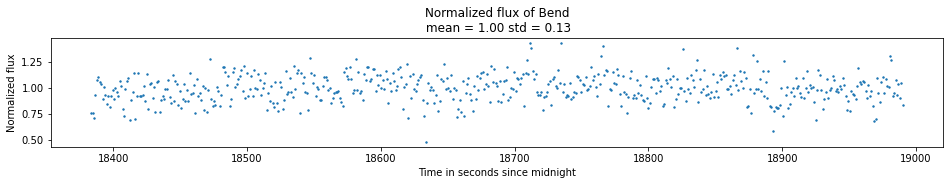

<Figure size 432x288 with 0 Axes>

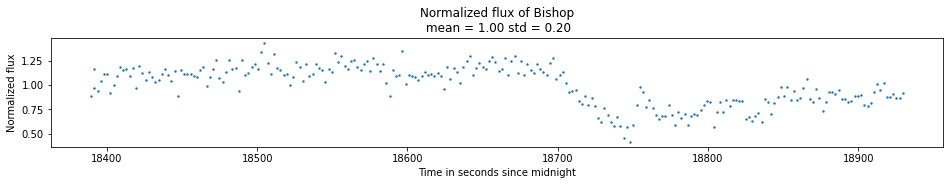

<Figure size 432x288 with 0 Axes>

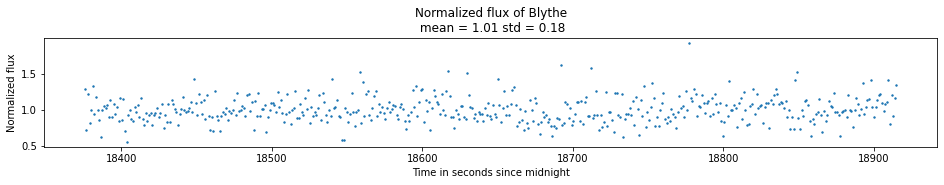

<Figure size 432x288 with 0 Axes>

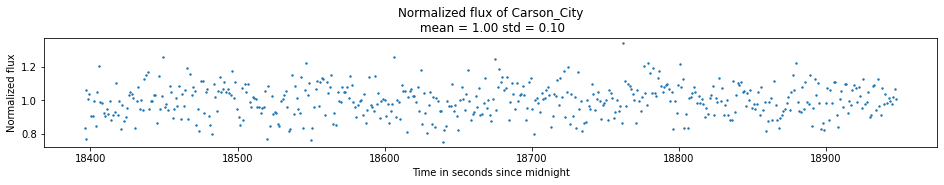

<Figure size 432x288 with 0 Axes>

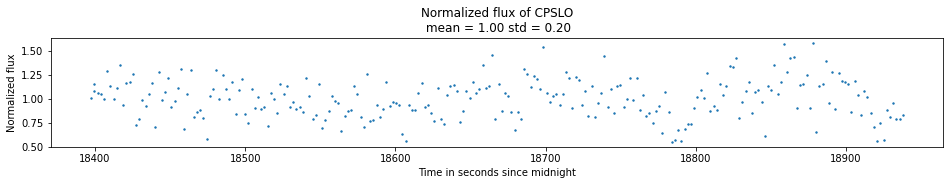

<Figure size 432x288 with 0 Axes>

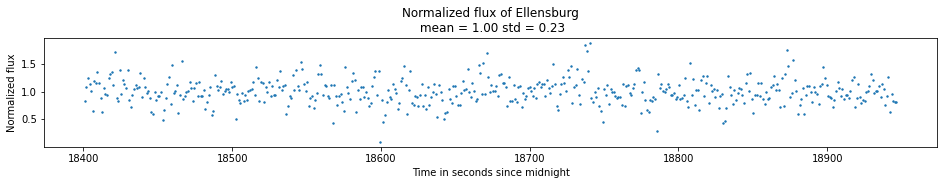

<Figure size 432x288 with 0 Axes>

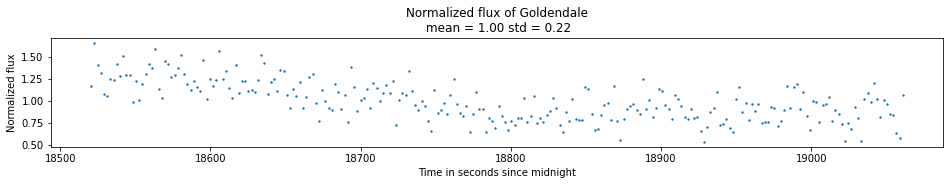

<Figure size 432x288 with 0 Axes>

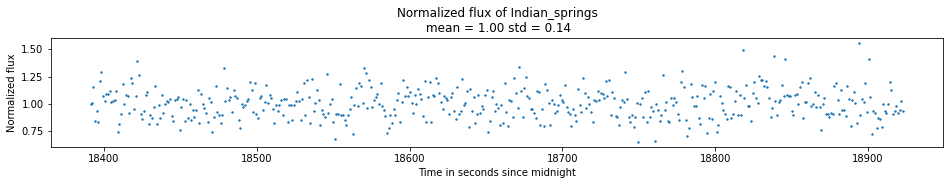

<Figure size 432x288 with 0 Axes>

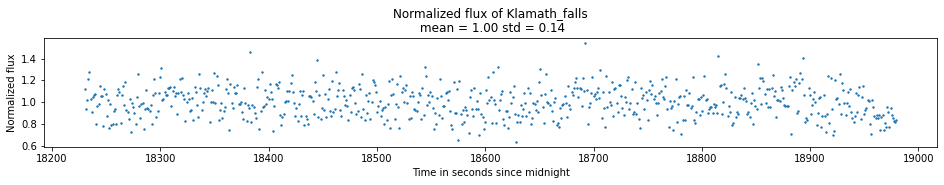

<Figure size 432x288 with 0 Axes>

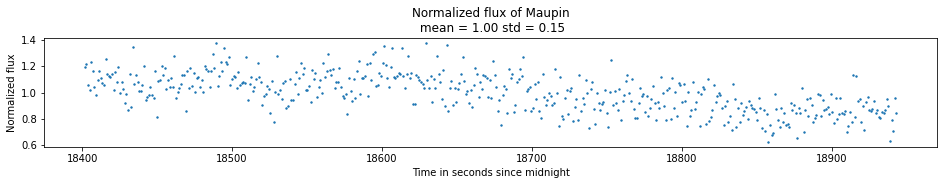

<Figure size 432x288 with 0 Axes>

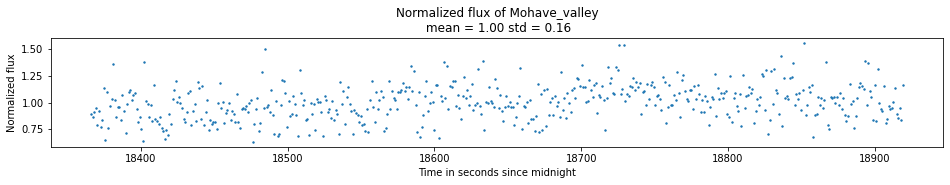

<Figure size 432x288 with 0 Axes>

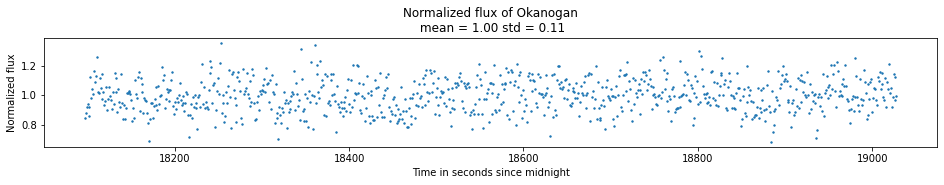

<Figure size 432x288 with 0 Axes>

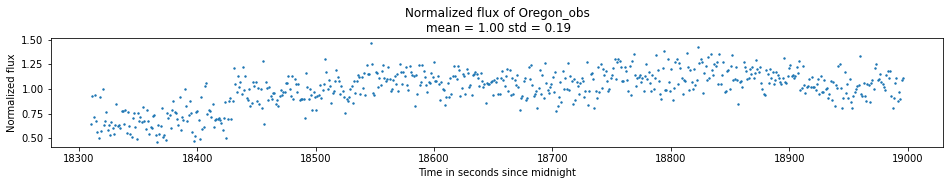

<Figure size 432x288 with 0 Axes>

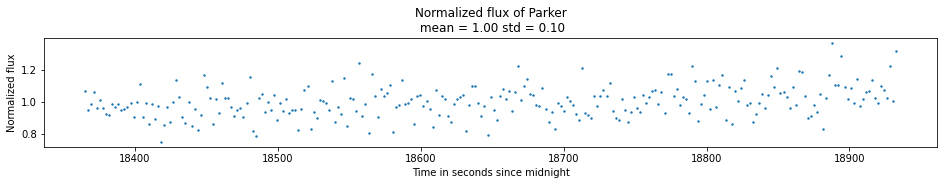

<Figure size 432x288 with 0 Axes>

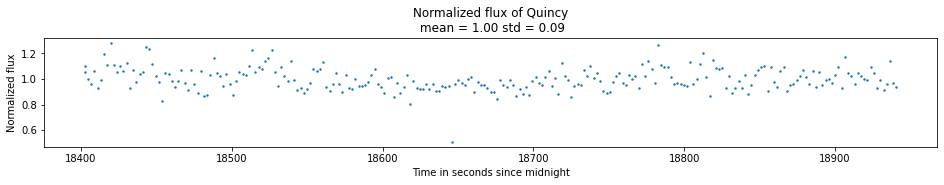

<Figure size 432x288 with 0 Axes>

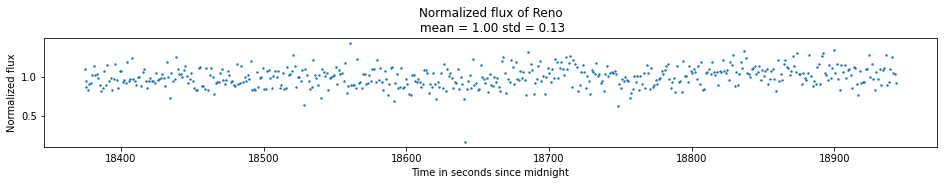

<Figure size 432x288 with 0 Axes>

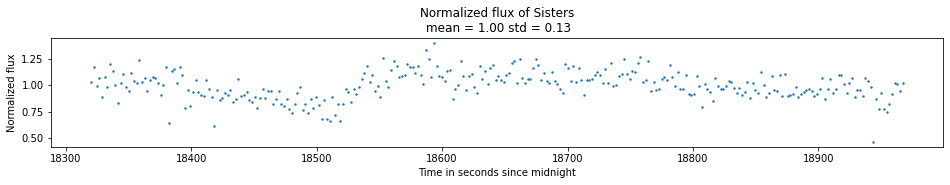

Mean < std in Susanville location


<Figure size 432x288 with 0 Axes>

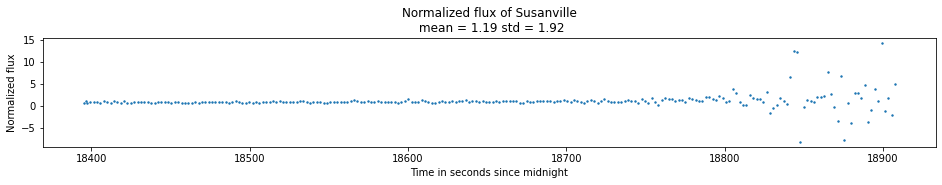

Mean < std in Susanville_b location


<Figure size 432x288 with 0 Axes>

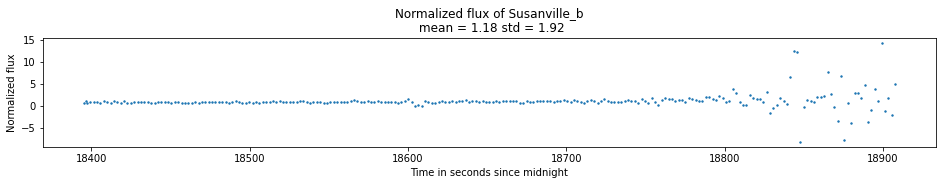

Mean < std in Susanville_c location


<Figure size 432x288 with 0 Axes>

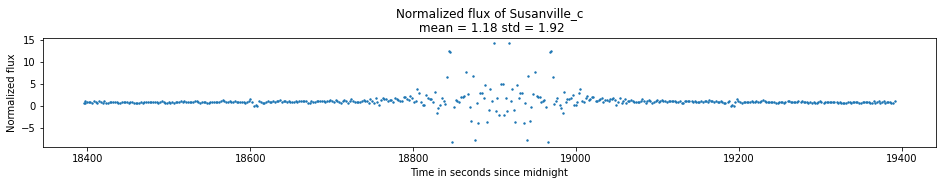

Mean < std in Wildwood location


<Figure size 432x288 with 0 Axes>

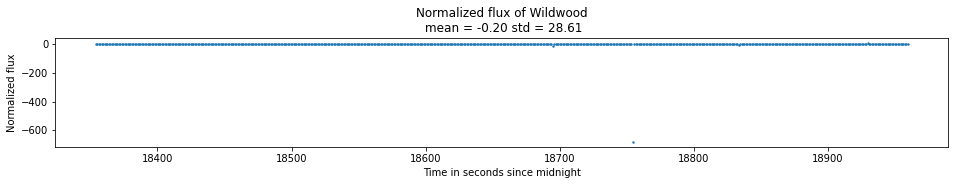

<Figure size 432x288 with 0 Axes>

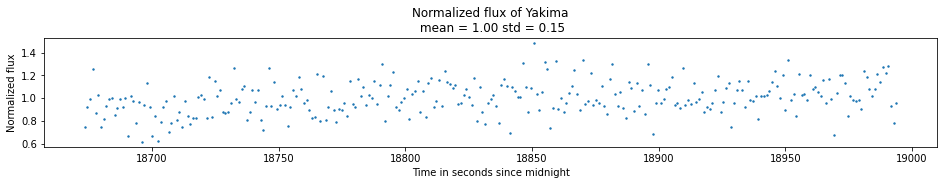

<Figure size 432x288 with 0 Axes>

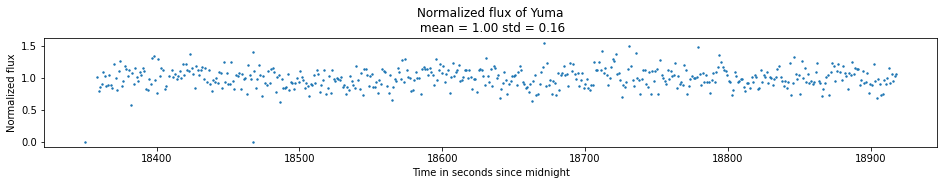

In [2]:
def is_float(string):
    """
    True if given string is float else False
    
    Input:
      string [string]: Data which is a string, for example the time, the
                       normalized flux, or the uncertainty of the flux
    
    Output:
      float(string) [float]: The float of the string
    """
    try:
        return float(string)
    except ValueError:
        return False

!pip install zipfile
from zipfile import ZipFile
archivos = ZipFile('lc_20190128_2014YY49-original.zip', 'r')
# archivos = np.load('lc_20190128_2014YY49.zip')
archivos.extractall()

size = (16, 2)

namelist = ['20190128_Bend.dat',
 '20190128_Bishop.dat',
 '20190128_Blythe.dat',
 '20190128_Carson_City.dat',
 '20190128_CPSLO.dat',
 '20190128_Ellensburg.dat',
 '20190128_Goldendale.dat',
 '20190128_Indian_springs.dat',
 '20190128_Klamath_falls.dat',
 '20190128_Maupin.dat',
 '20190128_Mohave_valley.dat',
 '20190128_Okanogan.dat',
 '20190128_Oregon_obs.dat',
 '20190128_Parker.dat',
 '20190128_Quincy.dat',
 '20190128_Reno.dat',
 '20190128_Sisters.dat',
 '20190128_Susanville.dat',
 '20190128_Susanville_b.dat',
 '20190128_Susanville_c.dat',
 '20190128_Wildwood.dat',
 '20190128_Yakima.dat',
 '20190128_Yuma.dat']

special_locations = ['20190128_Quincy.dat',
                      '20190128_Reno.dat',
                      '20190128_Susanville_b.dat',
                      '20190128_Susanville_c.dat',]

mean_less_than_std = []

for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  norm_flux = data[:, 1]
  flux_unc = data[:, 2]
  # for i in flux_unc:
  #   print(i)
  #   if flux_unc[i].isdigit() == False:  # si es que hay un string '****'
  #     mean = np.mean(norm_flux)
  #     std = np.std(norm_flux)
  #     plt.clf()
  #     plt.errorbar(time, norm_flux)
  #     plt.xlabel("Time in seconds since midnight")
  #     plt.ylabel("Normalized flux")
  #     plt.title(str(file)[:-4]+'\n mean: {:.2f}'.format(mean)+' std: {:.2f}'.format(std))
  #     plt.show()
  for i in range(len(norm_flux)): 
    if np.abs(norm_flux[i] - np.mean(norm_flux)) > 1*np.std(norm_flux[i]): # si es que un dato se pasa de 1σ (y comparado con datos vecinos)
      pass
  mean = np.mean(norm_flux)
  std = np.std(norm_flux)
  plt.clf()
  plt.figure(figsize=size)
  # plt.errorbar(time, norm_flux, yerr=flux_unc, ecolor='orange')
  plt.scatter(time, norm_flux, s=2)
  if mean < std:
    print('Mean < std in '+str(file)[9:-4]+' location')
    mean_less_than_std.append(str(file)[9:-4])
  plt.xlabel("Time in seconds since midnight")
  plt.ylabel("Normalized flux")
  plt.title('Normalized flux of '+str(file)[9:-4]+'\n mean = {:.2f}'.format(mean)+\
            ' std = {:.2f}'.format(std))
  plt.show()


# flux_unc = data[:, 2]
# plt.errorbar(time, norm_flux, yerr=flux_unc, ecolor='orange')

# https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy

In [3]:
mean_less_than_std

['Susanville', 'Susanville_b', 'Susanville_c', 'Wildwood']

In [4]:
# https://mail.google.com/mail/u/0/?tab=rm&ogbl#starred/QgrcJHrjCtFvDLGHjpjjqxngGMbGHZNfQgQ
# https://www.minorplanetcenter.net/iau/Sizes.html

def rolling_mean_std_SR(array, wd_size=2):
  """
  Calculates the moving average, the standard deviation and the signal-to-noise
  ratio (SR) of an array x, considering a wd_size window.

  Inputs:
    array [array]: Array to which the mean, the standard deviation and the SR
                   are calculated
    
    wd_size [int]: Size of the mobile window, by default it is equal to 2

  Output:
    np.array(rolling_mean), np.array(rolling_std), np.array(rolling_SR) [tuple]:

    Tuple composed of the moving average, the mobile standard deviation and the
    mobile SR. It is useful to use a slicing of the output with [0] or [1] or
    [2] respectively to get just one of these.
  """
  rolling_mean = []
  rolling_std = []
  rolling_SR = []

  for i in range(len(array)):
    min = max(0, i - wd_size + 1)
    this_window = array[min : i + 1]

    # Calculate the mean
    window_average = sum(this_window) / len(this_window)
    # Calculate the std
    window_var = sum((array - window_average) ** 2 for array in this_window) / len(this_window)
    window_std = np.sqrt(window_var)

    # Add them to the arrays
    rolling_mean.append(window_average)
    rolling_std.append(window_std)
    rolling_SR.append(window_average/window_std)

  return np.array(rolling_mean), np.array(rolling_std), np.array(rolling_SR)

# Por ejemplo, si la duración de la ocultación es de 0.1 s y el tiempo de
# exposición es de 0.05 s, entonces se usa un kernel de 0.1 / 0.05 = 2.

def size_kernel(maximum_exp_event_duration=0.1, unc_max_exp_event_duration=0, exposure_time=0.05):
  """
  Gives the size of the kernel that will be used in the cross-correlation. 
  It uses the data of the maximum expected duration, it uncertainty and the
  exposure time. 

  The maximum expected duration (equal to the ratio between the diameter and 
  velocity) is calculated assuming a spherical asteroid and
  an occultation that is detected diametrically, that is, that the center of
  the occultation shadow passes exactly over the observer.

  Inputs:
    maximum_exp_event_duration [float]: Maximum expected duration of the event.
                                        It is obtained assuming a spherical
                                        asteroid and an occultation that is
                                        detected diametrically, that is, that
                                        the center of the occultation shadow
                                        passes exactly over the observer event.
                                        It is in seconds.

    unc_max_exp_event_duration [float]: Uncertainty of the maximum expected
                                        duration of the event. It is in seconds.
                                    

    exposure_time [float]: Exposure time. It is in seconds. It is the cadence of
                           the detection or observation

  Output:
    kernel [int]:  Size of the kernel that will be used in the cross-correlation
                   It is the ratio between the duration of the occultation
                   (the ratio between the diameter and the velocity, which
                   is in seconds) and the exposure time.

  Example:
  size_kernel(maximum_exp_event_duration=0.1, unc_max_exp_event_duration=0,
  exposure_time=0.05) == 2
  z = x * y or z = x / y
  Δz / z =  √(Δx/x)^2 + √(Δy/y)^2 => Δz = z * (√(Δx/x)^2 + √(Δy/y)^2)
  """
  kernel_size = maximum_exp_event_duration / exposure_time
  uncertainty_kernel_size = kernel_size * (unc_max_exp_event_duration / maximum_exp_event_duration)
  return kernel_size, uncertainty_kernel_size

size_kernel(maximum_exp_event_duration=0.1, unc_max_exp_event_duration=0.5, exposure_time=0.05) # == 2

(2.0, 10.0)

In [5]:
!pip install uncertainties
from uncertainties import ufloat
from uncertainties.umath import *

max_exp_duration = ufloat(0.1, 0.5)
exposure_time =  ufloat(0.05, 0.0)

max_exp_duration / exposure_time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 4.5 MB/s 


2.0+/-10.0

In [6]:
def code_to_debug():
  import pdb; pdb.set_trace()

  size_kernel(maximum_exp_event_duration=0.1, unc_max_exp_event_duration=0.5, exposure_time=0.05)

In [7]:
# code_to_debug()

In [8]:
SR_less_than = []
possible_detection = []
for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  norm_flux = data[:, 1]
  flux_unc = data[:, 2]
  distances = []
  # compute distances between points
  for i in range(len(time) - 1):
    dist = time[i] - time[i+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = np.abs(sum(distances)) / len(distances) # es la cadencia, en este caso sería de 1s a 2s en algunos casos
  # print('Time average separation in '+str(file)[9:-4]+' location is {:.3f}'.format(time_avg_sep))
  a = np.zeros(4)
  b = - np.ones( round(  (55.2/21.5) / time_avg_sep) )
  kernel = np.concatenate((a, b, a), axis=None)
  correlate = np.correlate(norm_flux-1, kernel, 'valid')
  n = 2
  window = 2 * round(time_avg_sep) - 1 # is for Reno, for previous way
  # if (rolling_mean_std_SR(norm_flux, wd_size=window)[2] < n).any():
  #   print('SR < '+str(n)+' in '+str(file)[9:-4]+' location')
  #   SR_less_than.append(str(file)[9:-4])
  if np.max(correlate) > 5 * np.std(correlate) and (rolling_mean_std_SR(norm_flux, wd_size=window)[2] > n).all():
  # if np.max(correlate) > 5 * np.std(correlate) and (rolling_mean_std_SR(cut_right(norm_flux, n), wd_size=window)[2] > n).all():
    possible_detection.append(str(file)[9:-4])
possible_detection

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


['Quincy', 'Reno']

In [9]:
"masking"
possible_detection = []
for file in namelist:
  data = []
  with open(file, 'r') as f:
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
  data = np.array(data, dtype='O')
  time = data[:, 0]
  norm_flux = data[:, 1]
  flux_unc = data[:, 2]
  distances = []
  # compute distances between points
  for i in range(len(time) - 1):
    dist = time[i] - time[i+1]
    distances.append(dist) 
  # get the average
  time_avg_sep = np.abs(sum(distances)) / len(distances) # es la cadencia, en este caso sería de 1s a 2s en algunos casos
  # print('Time average separation in '+str(file)[9:-4]+' location is {:.3f}'.format(time_avg_sep))
  a = np.zeros(4)
  b = - np.ones( round(  (55.2/21.5) / time_avg_sep) )
  kernel = np.concatenate((a, b, a), axis=None)
  correlate = np.correlate(norm_flux-1, kernel, 'valid')
  # len(norm_flux) == 525, len(kernel) == 9, len(correlate) == 516
  n = 2
  window = 2 * round(time_avg_sep) - 1 # is for Reno, for previous way
  mask = np.max(correlate) > 5 * np.std(correlate)
  where = np.where(mask)
  # print(where) array([0]) -> localidades con possible detection, a priori
  # print(correlate[mask])
  if correlate[mask] != []:
    # print(correlate[mask])
    for i in correlate[mask]:
        if (rolling_mean_std_SR(norm_flux, wd_size=window)[2] > n).all():
          possible_detection.append(str(file)[9:-4])
possible_detection

# Because we are considering .all() with respect to the rolling SR > n, we are
# dismissing Susanville_b, because it has too much noise in the end. Note that
# we have to avoid the noises and search the possible detections without
# dismissing a location

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


['Quincy', 'Reno']

In [10]:
def safe_div(x, y):
  z = np.zeros(len(x))
  for i in range(len(x)):
    if y[i] == 0.0:
      z[i] = -10
    else:
      z[i] = x[i] / y[i]
  return z

def get_basic_data(file_string):
  with open(file_string, 'r') as f:
    data = []
    d = f.readlines()
    for i in d:
      k = i.rstrip().split(",")
      data.append([float(i) if is_float(i) else i for i in k]) 
    data = np.array(data, dtype='O')
    time = data[:, 0]
    norm_flux = data[:, 1]
    flux_unc = data[:, 2]
    distances = []
    # compute distances between points
    for i in range(len(time) - 1):
      dist = time[i] - time[i+1]
      distances.append(dist) 
    # get the average
    time_avg_sep = np.abs(sum(distances)) / len(distances) # es la cadencia, en este caso sería de 1s a 2s en algunos casos
    return time, norm_flux, flux_unc, time_avg_sep

In [20]:
# Quincy, Reno <- positive detection of RECON sites for the occultation by 2014 YY49
# 2014 YY49: radius r = 16 km (+2) (-1) km, velocity = 21.5 km/s
diameter = ufloat(32, 4) # here I assume that the uncertainty of the diameter is twice the uncertainty of the radius
velocity =  ufloat(21.5, 0.0)
duration = diameter / velocity

# nominal and uncertainty of the duration using uncertainties package
duration.n, duration.s, duration.n-duration.s, duration.n+duration.s

(1.4883720930232558,
 0.18604651162790697,
 1.302325581395349,
 1.6744186046511627)

In [22]:
# my function size_kernel returns the same values from above, so my implementation is correct
a = size_kernel(maximum_exp_event_duration=duration.n, unc_max_exp_event_duration=duration.s, exposure_time=2)
a[0] - a[1], a[0] + a[1]

(0.6511627906976745, 0.8372093023255813)

In [31]:
from scipy.stats import sigmaclip
radius = ufloat(32, 4)
velocity =  ufloat(21.5, 0.0)
duration = radius / velocity
def algorithm(input, maximum_exp_event_duration=duration.n, unc_max_exp_event_duration=duration.s,
              exposure_time=0.05, num_zeros=4, num_ones=3, half_window=30, 
              threshold=30, sigma=1.7):
  """
  input [string]: The string of the filename

  num_zeros [int]: The number of zeros from which the kernel will be generated.
                   The kernel is made by the concatenation of
                   num_zeros + num_ones * -1 + num_zeros, assuming that the
                   cross-correlation is made with normalized flux - 1.
                   By default is 4.

  num_ones [int]: The number of zeros from which the kernel will be generated.
                   The kernel is made by the concatenation of
                   num_zeros + num_ones * -1 + num_zeros, assuming that the
                   cross-correlation is made with normalized flux - 1.
                   By default is 3.

  half_window [int]: The window size. By default is 30.

  threshold [int]: The threshold limit used in the evaluation (if a point in the
                   cross-correlation / array of standard deviations > threshold)
                   This is inpired on the algorithm used in Bickerton et al. (2008)

  sigma [int]: The sigma used in sigma clipping.
               It will be used in scipy.sigmaclip
  """
  if type(input) == str:
    with open(input, 'r') as f:
      time, norm_flux, flux_unc, time_avg_sep = get_basic_data(input)
      # print('Time average separation in '+str(file)[9:-4]+' location is {:.3f}'.format(time_avg_sep))
      a = np.zeros(num_zeros) # 4
      # b = - np.ones(size_kernel(55.2, 21.5, 2)) # here b == 1 ITERAR SOBRE EL TAMAÑO DE KERNEL b
      b = - np.ones(num_ones) # 3
      kernel = np.concatenate((a, b, a), axis=None)
      correlate = np.correlate(norm_flux-1, kernel, 'valid')
      # if (correlate > 100).any():
      #   return print('Cross-correlation is too high, there is a bad observation at '\
      #                +str(input)[9:-4]+', max. cross-correlation is', np.max(correlate))
      
      width = 2 * len(b) - 1 # ancho del peak de cross-correlacion con kernel optimo
      half_window = width + 30 # 10 es variable
      start = half_window #####
      sigma = np.std(correlate) / np.std(norm_flux)
      threshold = threshold
      array_std = np.ones(len(correlate))
      array_length = np.zeros(len(correlate))
      for i in range(start, len(correlate)-start, 1):
        array_window = correlate[i - half_window : i + half_window + 1]
        array_wnd_clip = sigmaclip(array_window, low = sigma, high = sigma)[0]
        array_std[i] = np.std(array_wnd_clip)
        array_length[i] = array_wnd_clip.shape[0] # cantidad de puntos usados para el calculo de std de sigmaclip

      # if (safe_div(correlate, array_std) > 300).any():
      #   return print('safe_div(correlate, array_std) is too high, there is an error at '\
      #                +str(input)[9:-4]+', maximum safe_div(correlate, array_std) is ', np.max(safe_div(correlate, array_std)))

      list_mask = [ i for i in range(start, len(correlate)-start, 1) if safe_div(correlate, array_std)[i] > threshold ]
      if list_mask == []:
        return algorithm(input, maximum_exp_event_duration, unc_max_exp_event_duration,
                         exposure_time, num_zeros, num_ones, half_window, threshold-1, sigma)
      print('kernel size or size of np.ones() :', len(b))
      print('std_correlate', np.std(correlate))
      print('std_norm_flux', np.std(norm_flux))
      print('sigma = std cross-correlation / std norm flux', np.std(correlate) / np.std(norm_flux))
      print('threshold', threshold)
      
      fig, axs = plt.subplots(1, 4, figsize=(20,5))
      axs[0].plot(correlate, label='correlate')
      axs[0].set_title('correlate at '+str(input)[9:-4])

      axs[1].plot(array_std)
      axs[1].set_title('array_std at '+str(input)[9:-4])

      axs[2].plot(array_length)
      axs[2].set_title('array_length at '+str(input)[9:-4])

      axs[3].plot(safe_div(correlate, array_std), label='safe_div(correlate, array_std)')
      axs[3].set_title('correlate / array_std at '+str(input)[9:-4]+'\n half_window = {}'.format(half_window)+' threshold = {}'.format(threshold)+
                       ' \n kernel size or size of np.ones() = {}'.format(len(b))+' sigma = {:.3f}'.format(sigma)+'\n time average separation = {:.3f}'\
                       .format(time_avg_sep)+' \n max. correlate / array_std is {:.3f}'.format(np.max(safe_div(correlate, array_std)))+\
                       '\n min. correlate / array_std is {:.3f}'.format(np.min(safe_div(correlate, array_std))))
      plt.show()
      print('maximum safe_div(correlate, array_std)', np.max(safe_div(correlate, array_std)),\
                     ' at np.argmax(safe_div(correlate, array_std))', np.argmax(safe_div(correlate, array_std)) )
      print('list_mask', list_mask)
      print('Possible detection in '+str(input)[9:-4]+', in time : '+str(time[np.array(list_mask) + round(kernel.shape[0] / 2) ]))
      print('--------------------------------------------------------------------------------------------')


kernel size or size of np.ones() : 2
std_correlate 2.67053279627404
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.3878613896986418
threshold 30


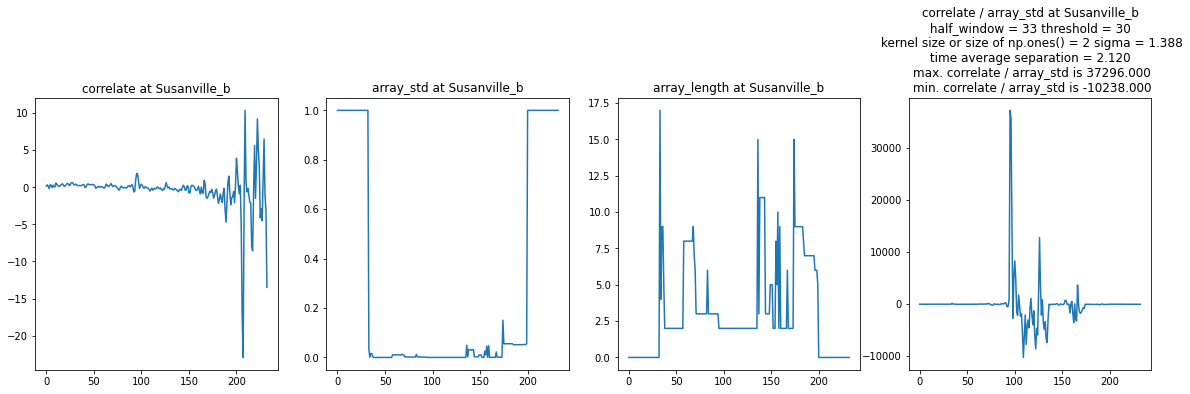

maximum safe_div(correlate, array_std) 37296.00000000411  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [34, 37, 63, 68, 71, 72, 73, 79, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 99, 100, 101, 104, 117, 125, 126, 127, 129, 144, 145, 148, 152, 153, 154, 160, 163, 166]
Possible detection in Susanville_b, in time : [18476.294 18482.701 18538.223 18548.899 18555.306 18557.443 18559.578
 18572.39 18587.339 18589.474 18591.609 18593.746 18595.881 18598.016
 18604.424 18606.558 18608.693 18610.831 18615.099 18617.236 18619.369
 18625.776 18653.539 18670.622 18672.757 18674.892 18679.164 18711.195
 18713.332 18719.739 18728.279 18730.416 18732.551 18745.364 18751.769
 18758.176]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 3.267658877710292
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.698184571036715
threshold 26


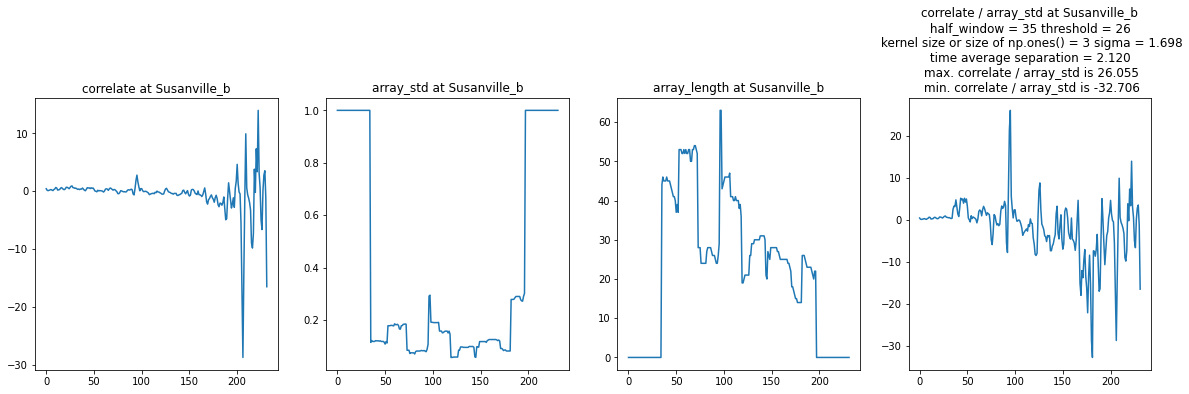

maximum safe_div(correlate, array_std) 26.05507076155497  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [95]
Possible detection in Susanville_b, in time : [18608.693]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.569182710731447
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.8548848693846178
threshold 8


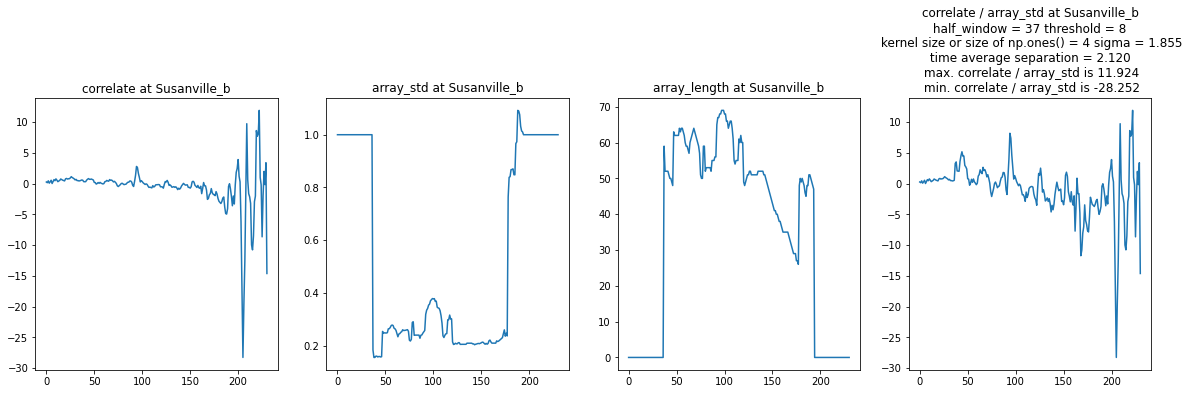

maximum safe_div(correlate, array_std) 11.9237  at np.argmax(safe_div(correlate, array_std)) 222
list_mask [94]
Possible detection in Susanville_b, in time : [18606.558]
--------------------------------------------------------------------------------------------


In [32]:
for j in range(2, 5, 1):
  algorithm(input='20190128_Susanville_b.dat', num_ones=j)

kernel size or size of np.ones() : 2
std_correlate 2.767193911907672
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.4380956464957442
threshold 30


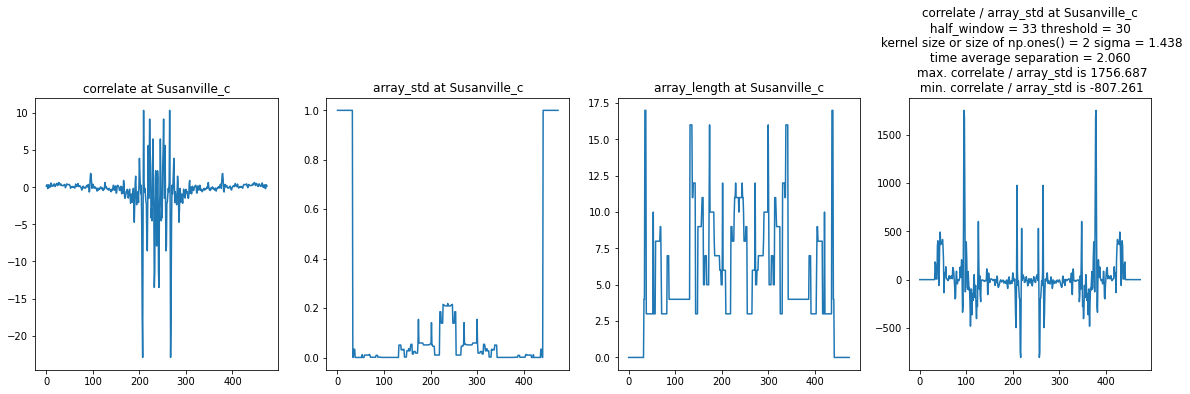

maximum safe_div(correlate, array_std) 1756.687004358324  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [33, 34, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 63, 68, 71, 72, 73, 79, 87, 89, 90, 91, 94, 95, 96, 97, 99, 100, 101, 104, 117, 125, 126, 127, 129, 144, 145, 148, 166, 200, 201, 209, 210, 219, 222, 223, 229, 245, 251, 252, 255, 264, 265, 273, 274, 308, 326, 329, 330, 345, 347, 348, 349, 357, 370, 373, 374, 375, 377, 378, 379, 380, 383, 384, 385, 387, 395, 401, 402, 403, 406, 411, 418, 419, 420, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 434, 435, 436, 440, 441]
Possible detection in Susanville_c, in time : [18474.159 18476.294 18484.834 18486.971 18489.108 18493.378 18495.513
 18497.65 18499.785 18501.92 18504.055 18506.19 18508.327 18510.462
 18512.597 18519.004 18521.141 18523.274 18538.223 18548.899 18555.306
 18557.443 18559.578 18572.39 18589.474 18593.746 18595.881 18598.016
 18604.424 18606.558 18608.693 18610.831 18615.099 18617.236

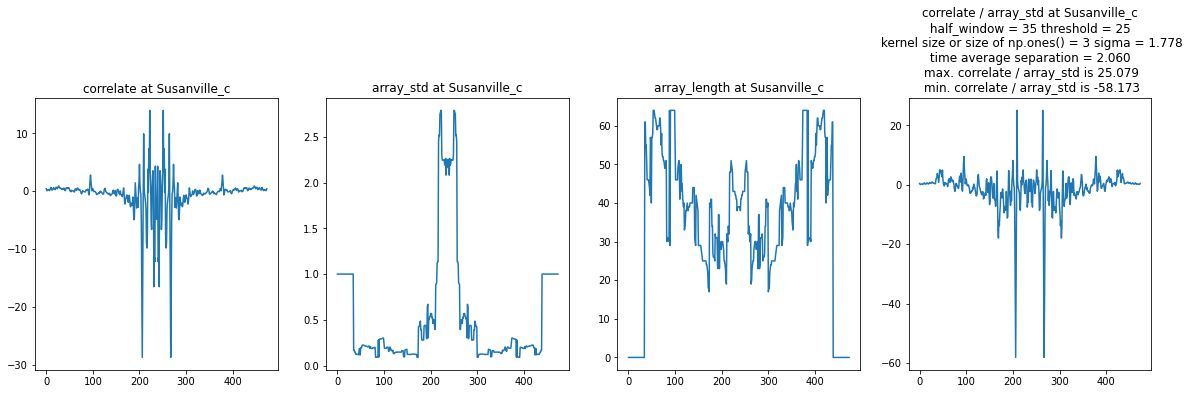

maximum safe_div(correlate, array_std) 25.07927557896054  at np.argmax(safe_div(correlate, array_std)) 209
list_mask [209, 264]
Possible detection in Susanville_c, in time : [18852.137 18965.863]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.770308933314508
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.9594090748796487
threshold 7


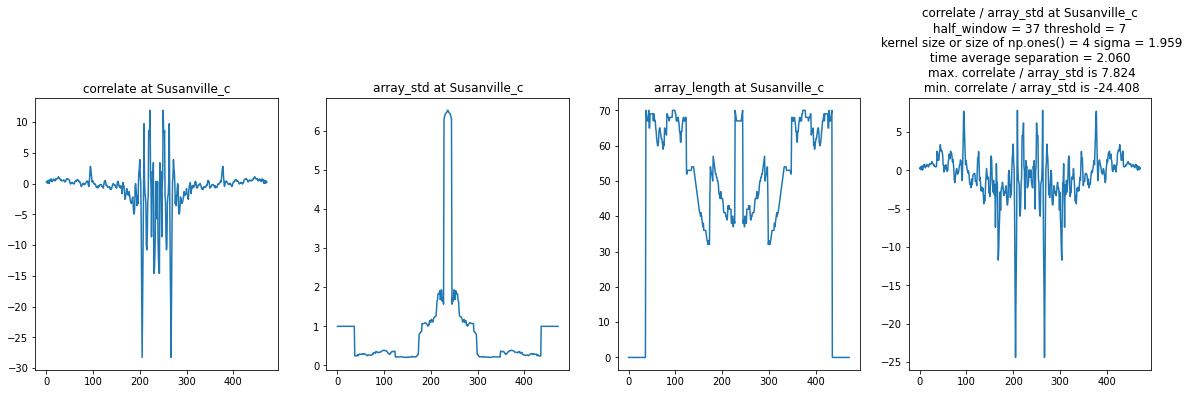

maximum safe_div(correlate, array_std) 7.82425220062377  at np.argmax(safe_div(correlate, array_std)) 209
list_mask [94, 95, 209, 263, 377, 378]
Possible detection in Susanville_c, in time : [18606.558 18608.693 18852.137 18963.002 19191.558 19193.424]
--------------------------------------------------------------------------------------------


In [33]:
for j in range(2, 5, 1):
  algorithm(input='20190128_Susanville_c.dat', num_ones=j)

**Quincy**

18643.803, 0.9477, 0.0777

18645.942, 0.5093, 0.0654 <-----

18648.077, 0.9617, 0.0758

**Reno**

18640.348, 0.7102, 0.1398

18641.416, 0.1675, 0.1342 <-----

18642.483, 0.8404, 0.1401

**Susanville b**

18602.287, 0.9905, 1.1092

18604.424, 0.0035, 1.0592 <-----

18606.558, 0.1317, 1.0123 <-----

18608.693, 0.0733, 1.4391 <-----

18610.831, 1.1711, 1.3257

kernel size or size of np.ones() : 2
std_correlate 0.14610343843158752
std_norm_flux 0.08920128937778901
sigma = std cross-correlation / std norm flux 1.6379072483224335
threshold 30


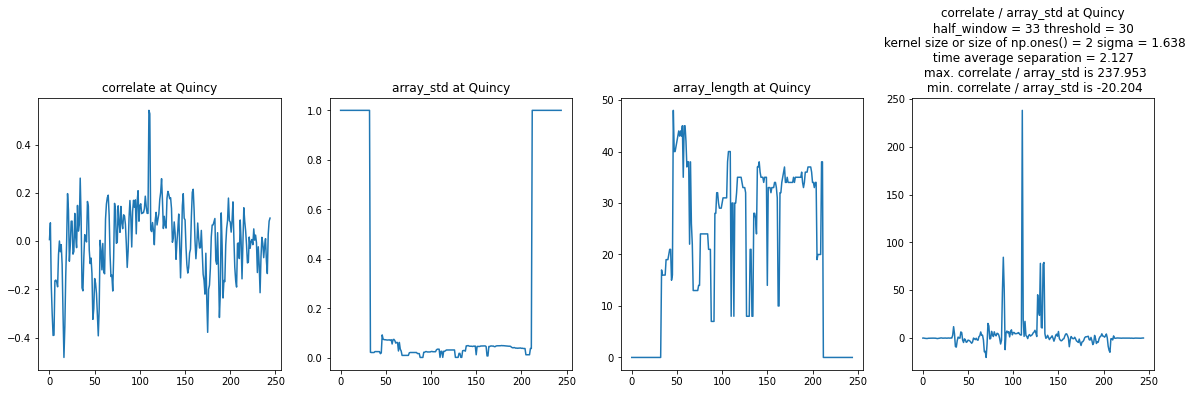

maximum safe_div(correlate, array_std) 237.9532856162468  at np.argmax(safe_div(correlate, array_std)) 110
list_mask [88, 89, 90, 110, 127, 130, 133, 134]
Possible detection in Quincy, in time : [18598.96 18601.095 18603.23 18645.942 18682.242 18688.649 18695.056
 18697.191]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.19247058478278875
std_norm_flux 0.1285539277124569
sigma = std cross-correlation / std norm flux 1.497197232380931
threshold 30


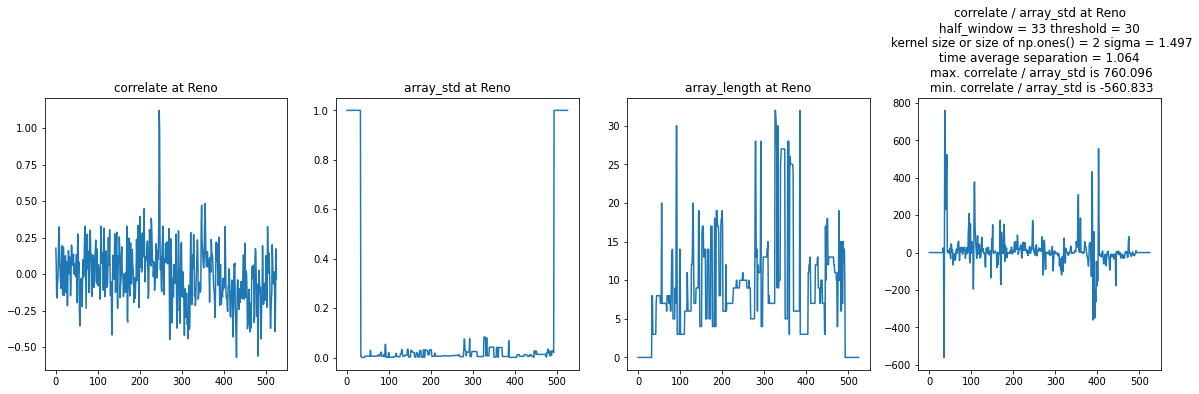

maximum safe_div(correlate, array_std) 760.0957600961826  at np.argmax(safe_div(correlate, array_std)) 37
list_mask [37, 38, 39, 40, 41, 42, 52, 53, 68, 69, 70, 93, 94, 95, 98, 101, 102, 107, 108, 109, 110, 111, 115, 119, 120, 125, 149, 150, 151, 169, 172, 177, 178, 179, 181, 196, 203, 206, 207, 210, 211, 217, 218, 222, 223, 224, 227, 228, 239, 245, 246, 247, 248, 254, 255, 268, 269, 273, 274, 293, 321, 337, 350, 351, 353, 354, 355, 360, 370, 371, 372, 373, 381, 382, 384, 387, 388, 392, 403, 404, 474, 475]
Possible detection in Reno, in time : [18418.26 18419.327 18420.393 18421.461 18422.53 18423.597 18434.274
 18435.342 18451.36 18452.425 18453.493 18478.051 18479.119 18480.186
 18483.39 18486.595 18487.66 18493.0 18494.067 18495.137 18496.204
 18497.27 18501.542 18505.814 18506.879 18512.219 18537.844 18538.914
 18539.981 18559.2 18562.402 18567.74 18568.809 18569.878 18572.013
 18588.028 18595.502 18598.705 18599.774 18602.978 18604.044 18610.453
 18611.517 18615.79 18616.86 18617.

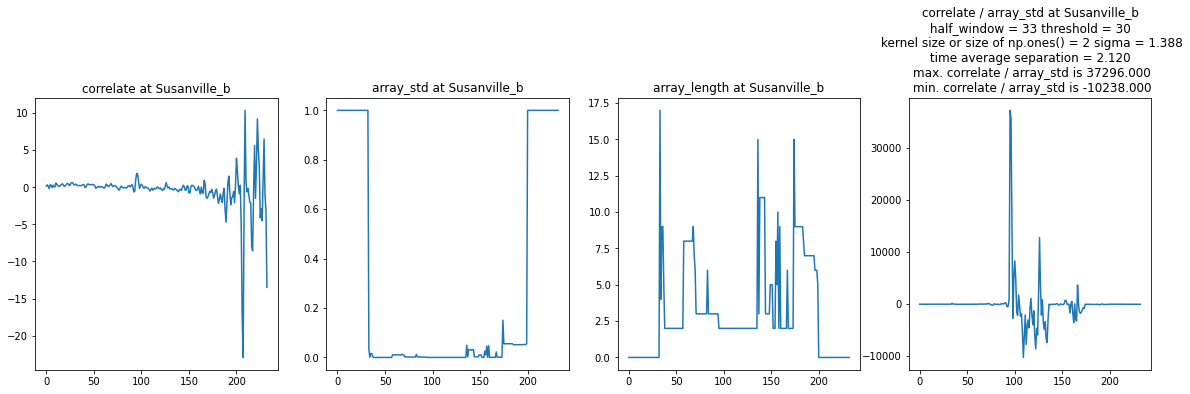

maximum safe_div(correlate, array_std) 37296.00000000411  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [34, 37, 63, 68, 71, 72, 73, 79, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 99, 100, 101, 104, 117, 125, 126, 127, 129, 144, 145, 148, 152, 153, 154, 160, 163, 166]
Possible detection in Susanville_b, in time : [18476.294 18482.701 18538.223 18548.899 18555.306 18557.443 18559.578
 18572.39 18587.339 18589.474 18591.609 18593.746 18595.881 18598.016
 18604.424 18606.558 18608.693 18610.831 18615.099 18617.236 18619.369
 18625.776 18653.539 18670.622 18672.757 18674.892 18679.164 18711.195
 18713.332 18719.739 18728.279 18730.416 18732.551 18745.364 18751.769
 18758.176]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 2.767193911907672
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.4380956464957442
threshold 30


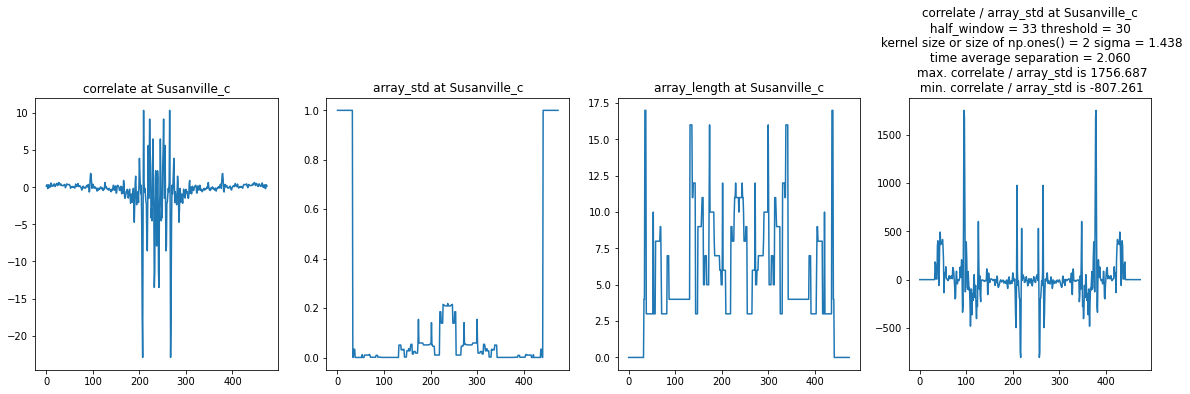

maximum safe_div(correlate, array_std) 1756.687004358324  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [33, 34, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 63, 68, 71, 72, 73, 79, 87, 89, 90, 91, 94, 95, 96, 97, 99, 100, 101, 104, 117, 125, 126, 127, 129, 144, 145, 148, 166, 200, 201, 209, 210, 219, 222, 223, 229, 245, 251, 252, 255, 264, 265, 273, 274, 308, 326, 329, 330, 345, 347, 348, 349, 357, 370, 373, 374, 375, 377, 378, 379, 380, 383, 384, 385, 387, 395, 401, 402, 403, 406, 411, 418, 419, 420, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 434, 435, 436, 440, 441]
Possible detection in Susanville_c, in time : [18474.159 18476.294 18484.834 18486.971 18489.108 18493.378 18495.513
 18497.65 18499.785 18501.92 18504.055 18506.19 18508.327 18510.462
 18512.597 18519.004 18521.141 18523.274 18538.223 18548.899 18555.306
 18557.443 18559.578 18572.39 18589.474 18593.746 18595.881 18598.016
 18604.424 18606.558 18608.693 18610.831 18615.099 18617.236

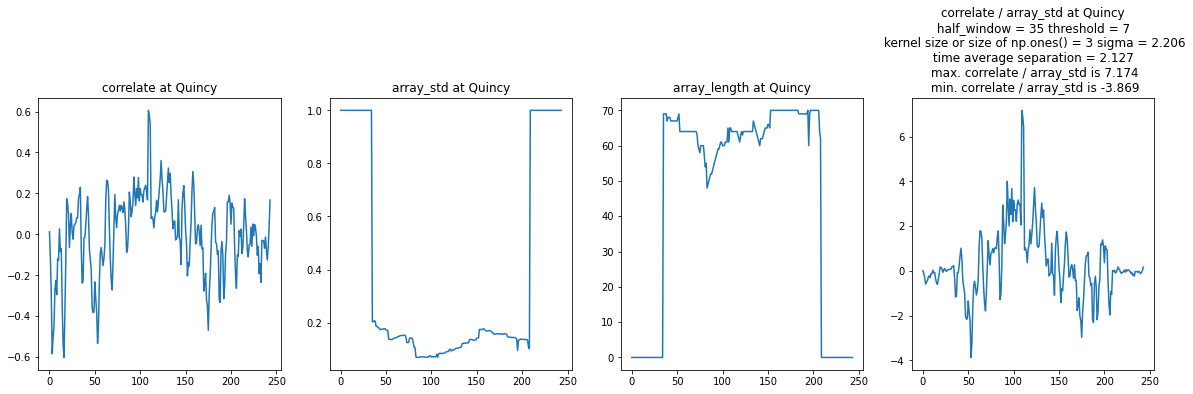

maximum safe_div(correlate, array_std) 7.174238815855688  at np.argmax(safe_div(correlate, array_std)) 109
list_mask [109]
Possible detection in Quincy, in time : [18645.942]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.2434318643190354
std_norm_flux 0.1285539277124569
sigma = std cross-correlation / std norm flux 1.8936166996276598
threshold 9


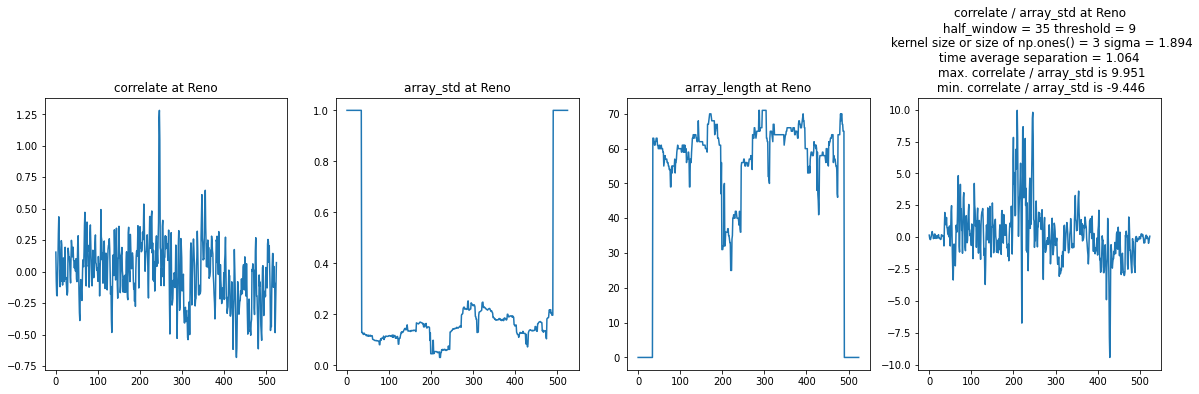

maximum safe_div(correlate, array_std) 9.951437124895746  at np.argmax(safe_div(correlate, array_std)) 209
list_mask [209, 245, 246]
Possible detection in Reno, in time : [18602.978 18641.416 18642.483]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 3.267658877710292
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.698184571036715
threshold 26


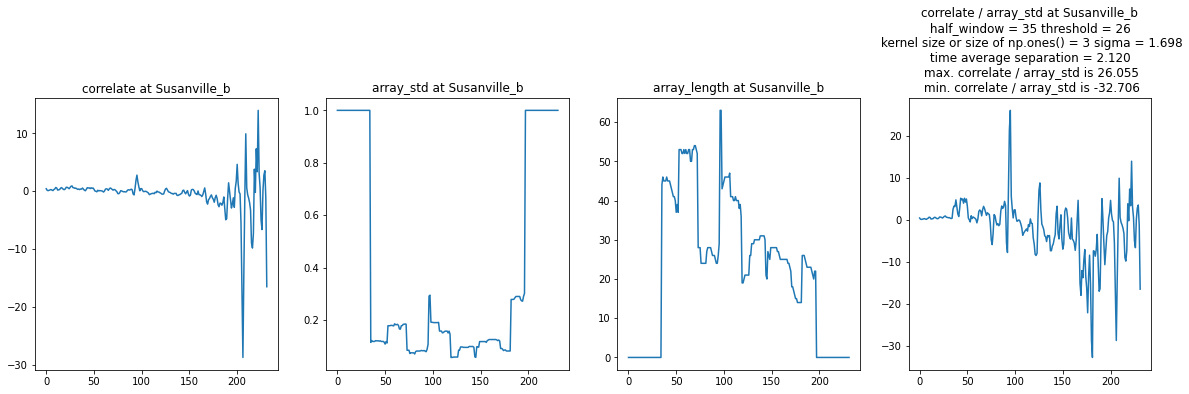

maximum safe_div(correlate, array_std) 26.05507076155497  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [95]
Possible detection in Susanville_b, in time : [18608.693]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 3.421366484253177
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.7780655793214646
threshold 25


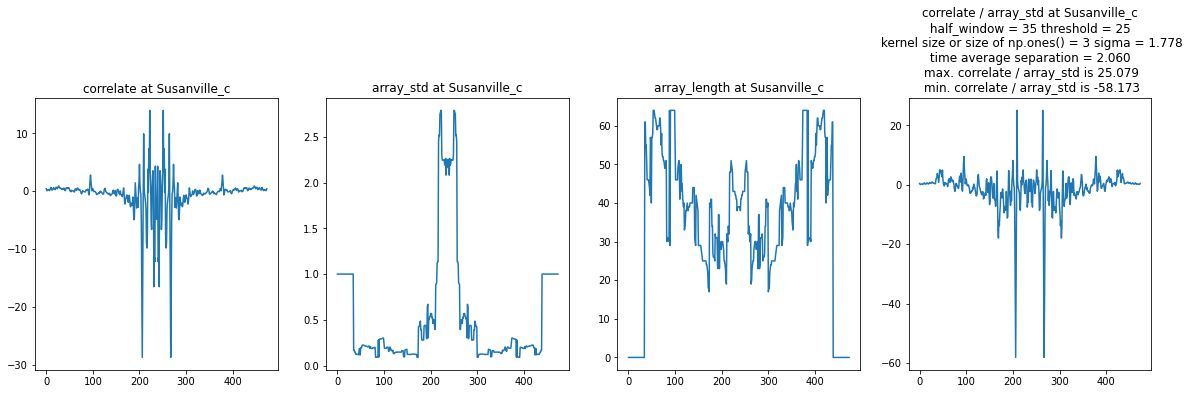

maximum safe_div(correlate, array_std) 25.07927557896054  at np.argmax(safe_div(correlate, array_std)) 209
list_mask [209, 264]
Possible detection in Susanville_c, in time : [18852.137 18965.863]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.24448791443165052
std_norm_flux 0.08920128937778901
sigma = std cross-correlation / std norm flux 2.740856282874849
threshold 5


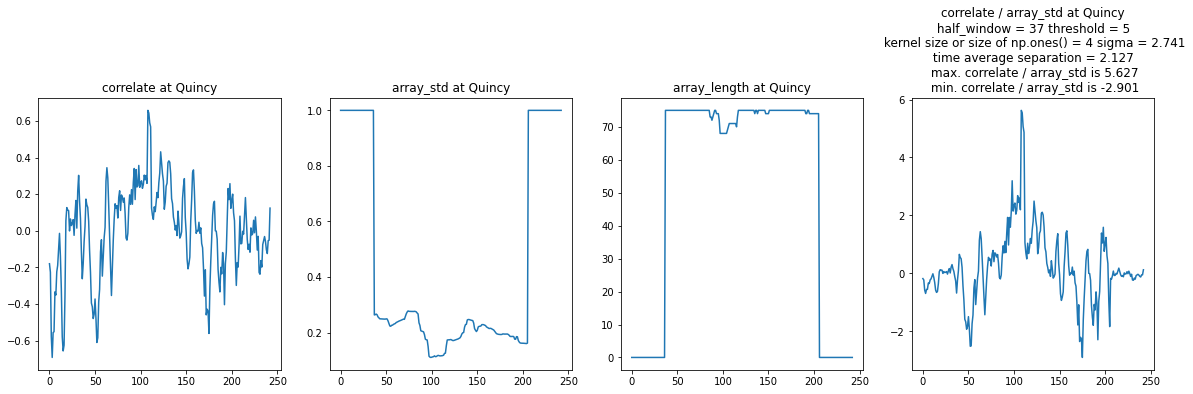

maximum safe_div(correlate, array_std) 5.62726834987358  at np.argmax(safe_div(correlate, array_std)) 108
list_mask [108, 109, 110]
Possible detection in Quincy, in time : [18643.803 18645.942 18648.077]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.2890123579473668
std_norm_flux 0.1285539277124569
sigma = std cross-correlation / std norm flux 2.248179912431889
threshold 6


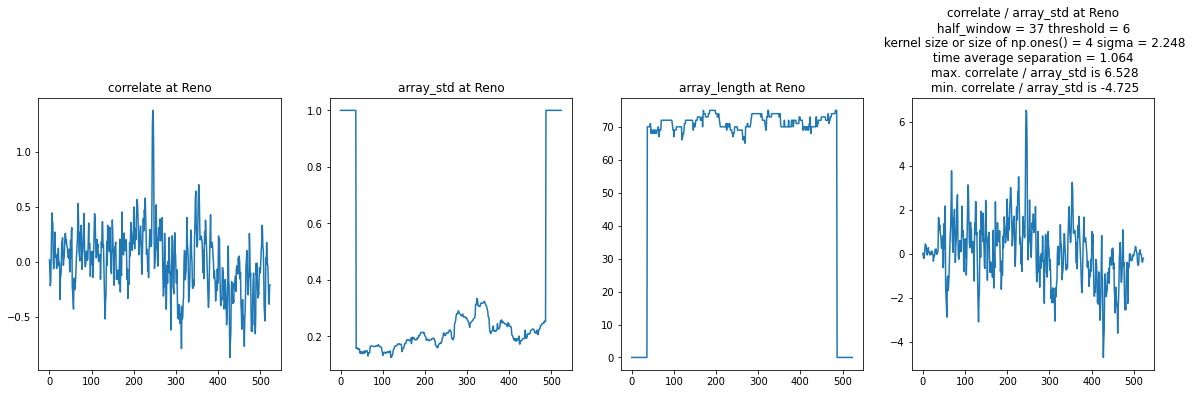

maximum safe_div(correlate, array_std) 6.528268960493116  at np.argmax(safe_div(correlate, array_std)) 245
list_mask [245, 246]
Possible detection in Reno, in time : [18641.416 18642.483]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.569182710731447
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.8548848693846178
threshold 8


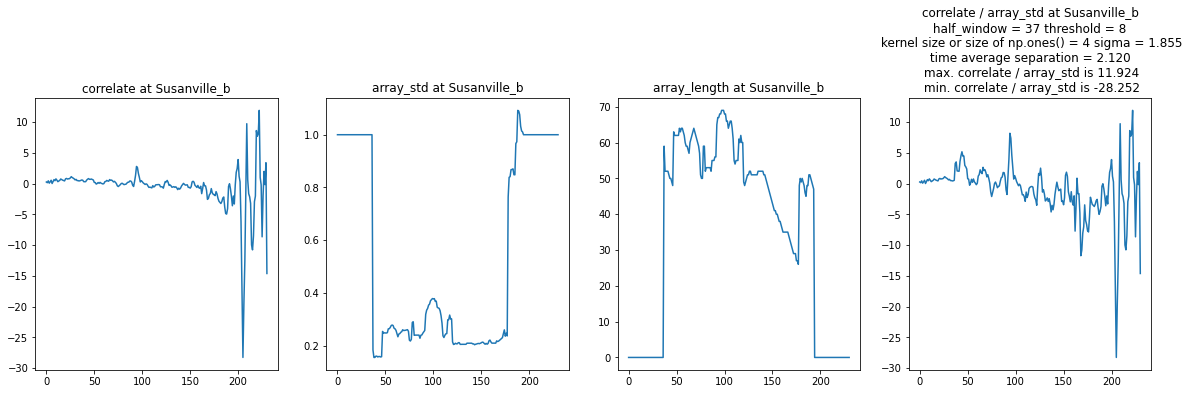

maximum safe_div(correlate, array_std) 11.9237  at np.argmax(safe_div(correlate, array_std)) 222
list_mask [94]
Possible detection in Susanville_b, in time : [18606.558]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.770308933314508
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.9594090748796487
threshold 7


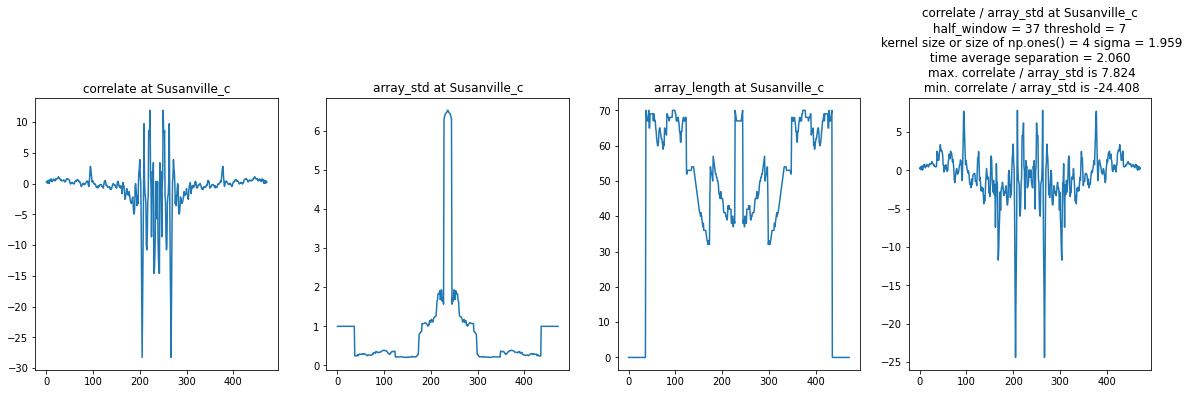

maximum safe_div(correlate, array_std) 7.82425220062377  at np.argmax(safe_div(correlate, array_std)) 209
list_mask [94, 95, 209, 263, 377, 378]
Possible detection in Susanville_c, in time : [18606.558 18608.693 18852.137 18963.002 19191.558 19193.424]
--------------------------------------------------------------------------------------------


In [34]:
"esto es para ver esto de los falsos positivos"
# itero sobre las localidades con detecciones reales/ficticias (Quincy, Reno, Susanville_b y c)
for j in range(2, 5, 1): # iteration over kernel size
  for filename in special_locations:
    algorithm(filename, maximum_exp_event_duration=0.1, unc_max_exp_event_duration=0, 
              exposure_time=0.05, num_zeros=4, num_ones=j, half_window=30, threshold=30, sigma=1.7)

kernel size or size of np.ones() : 2
std_correlate 0.20071844529116412
std_norm_flux 0.13050723485391302
sigma = std cross-correlation / std norm flux 1.5379871124834115
threshold 30


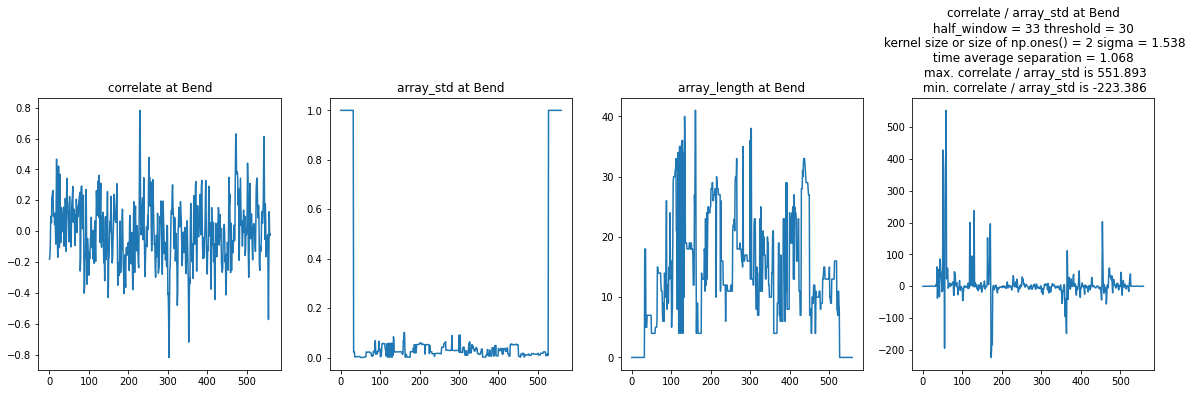

maximum safe_div(correlate, array_std) 551.8928151898737  at np.argmax(safe_div(correlate, array_std)) 59
list_mask [36, 40, 41, 43, 44, 45, 46, 51, 54, 56, 57, 58, 59, 61, 62, 63, 80, 82, 119, 120, 124, 125, 130, 164, 168, 169, 170, 171, 229, 366, 382, 396, 455, 456, 471, 472, 473, 474, 479, 502, 503, 526]
Possible detection in Bend, in time : [18427.354 18431.624 18432.694 18434.824 18435.894 18436.964 18438.034
 18443.364 18446.574 18448.714 18449.774 18450.844 18451.914 18454.044
 18455.114 18456.184 18474.334 18476.464 18515.974 18517.044 18521.314
 18522.384 18527.724 18564.024 18568.294 18569.364 18570.434 18571.494
 18633.424 18779.704 18796.794 18811.734 18874.734 18875.804 18891.814
 18892.884 18893.954 18895.014 18900.364 18924.914 18925.984 18950.544]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.39549132445221524
std_norm_flux 0.20237887784074302
sigma = std cross-correlatio

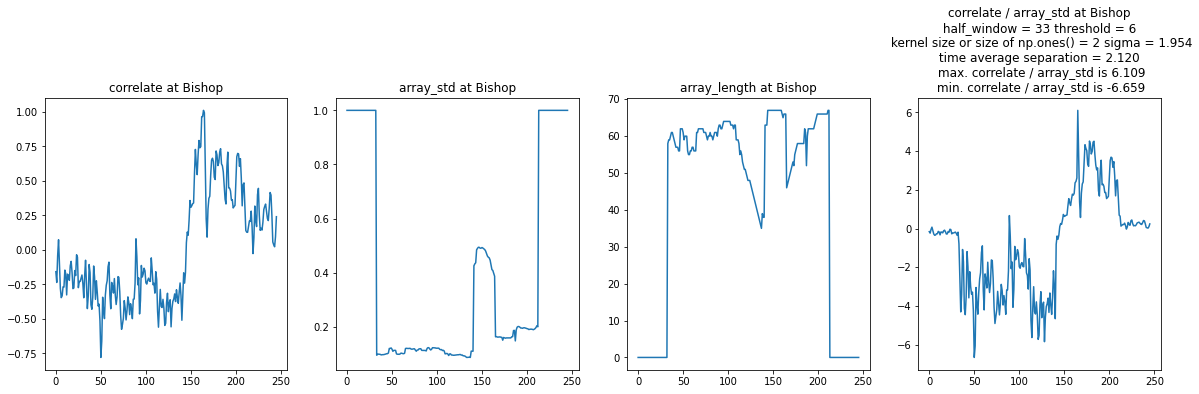

maximum safe_div(correlate, array_std) 6.1087236492245145  at np.argmax(safe_div(correlate, array_std)) 165
list_mask [165]
Possible detection in Bishop, in time : [18750.348]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.25769382736187757
std_norm_flux 0.17587123625700551
sigma = std cross-correlation / std norm flux 1.4652414621416685
threshold 30


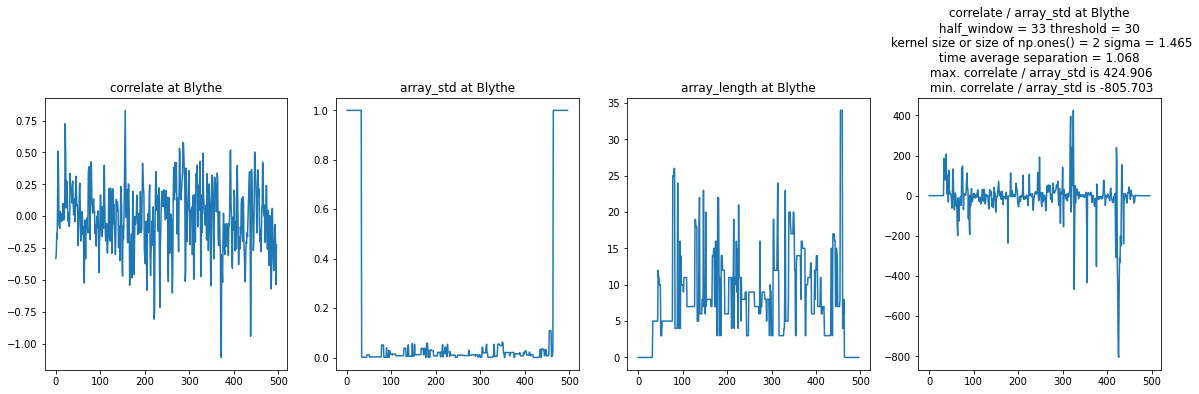

maximum safe_div(correlate, array_std) 424.90616420585394  at np.argmax(safe_div(correlate, array_std)) 324
list_mask [33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 53, 54, 73, 74, 75, 84, 85, 86, 87, 95, 120, 123, 146, 155, 156, 157, 183, 195, 196, 197, 211, 225, 244, 248, 265, 268, 269, 271, 278, 279, 285, 286, 287, 288, 289, 293, 299, 300, 303, 317, 318, 321, 322, 323, 324, 325, 328, 332, 377, 392, 393, 408, 421, 422, 433, 449, 450]
Possible detection in Blythe, in time : [18416.414 18417.484 18418.554 18419.624 18420.684 18421.754 18422.824
 18424.954 18426.024 18428.164 18437.774 18438.834 18459.124 18460.194
 18461.264 18470.874 18471.944 18473.004 18474.074 18482.614 18509.314
 18512.514 18537.074 18546.684 18547.744 18548.814 18576.574 18589.394
 18590.454 18591.524 18606.474 18621.424 18641.704 18645.984 18664.134
 18667.334 18668.404 18670.534 18678.014 18679.074 18685.484 18686.554
 18687.614 18688.684 18689.754 18694.024 18700.434 18701.504 18704.704
 18719.654 18720.714 18723.92

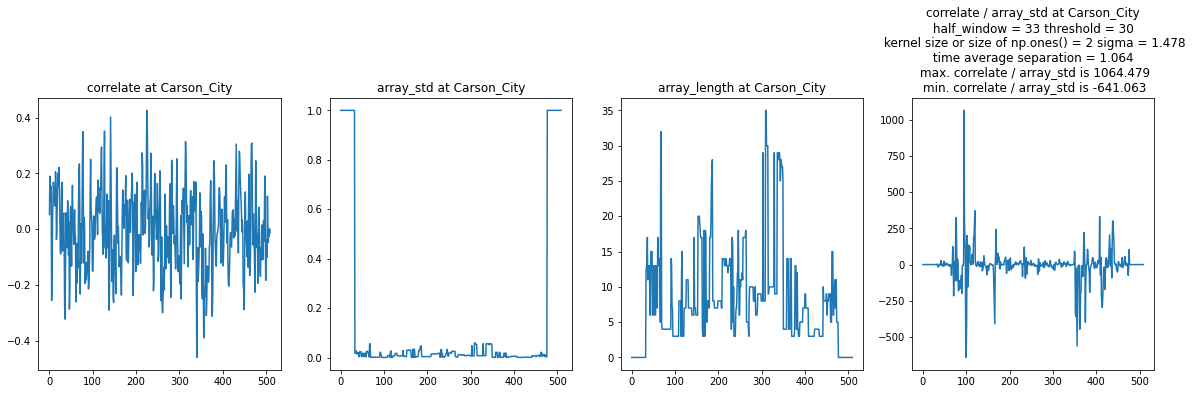

maximum safe_div(correlate, array_std) 1064.4785483981095  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [69, 70, 76, 77, 78, 80, 95, 96, 97, 98, 102, 103, 106, 107, 108, 114, 117, 118, 119, 120, 141, 142, 168, 169, 173, 174, 176, 189, 190, 191, 197, 201, 202, 234, 238, 267, 315, 350, 351, 371, 372, 373, 380, 381, 391, 392, 393, 407, 408, 411, 422, 423, 424, 429, 430, 431, 432, 434, 437, 438, 439, 440, 441, 460, 465, 466, 476]
Possible detection in Carson_City, in time : [18474.056 18475.123 18481.53 18482.599 18483.665 18485.8 18501.818
 18502.884 18503.953 18505.019 18509.291 18510.358 18513.561 18514.63
 18515.699 18522.104 18525.307 18526.374 18527.442 18528.511 18550.933
 18552.0 18579.761 18580.83 18585.1 18586.168 18588.303 18602.184
 18603.251 18604.319 18610.726 18614.996 18616.063 18650.232 18654.503
 18685.466 18736.717 18774.089 18775.156 18796.512 18797.579 18798.645
 18806.119 18807.189 18817.866 18818.931 18820.001 18834.951 18836.017
 18839.219 18850.966 188

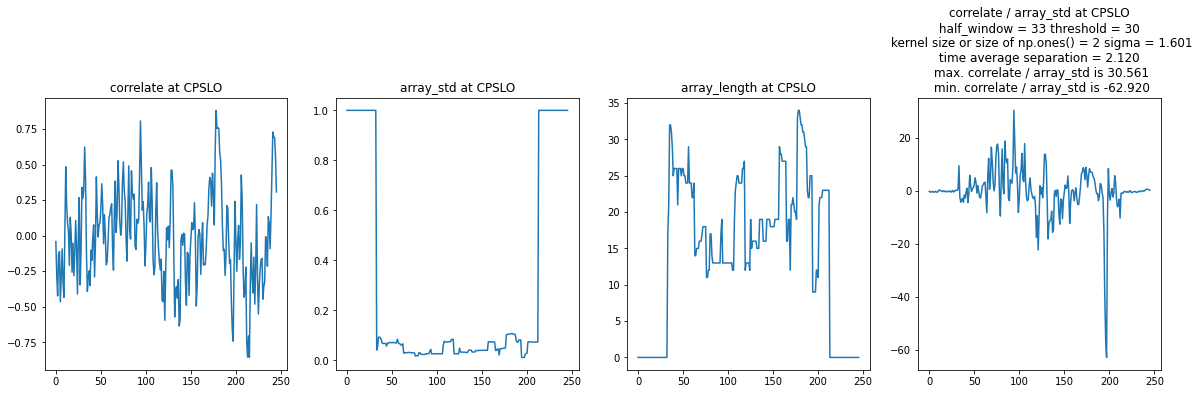

maximum safe_div(correlate, array_std) 30.56113790165669  at np.argmax(safe_div(correlate, array_std)) 94
list_mask [94]
Possible detection in CPSLO, in time : [18606.728]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.35878426506404987
std_norm_flux 0.22939567213016832
sigma = std cross-correlation / std norm flux 1.5640411248057953
threshold 30


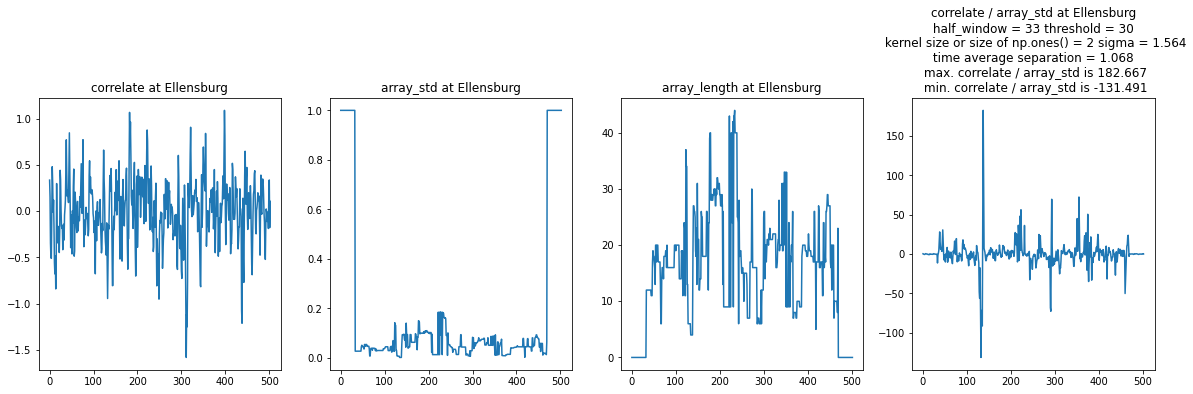

maximum safe_div(correlate, array_std) 182.66666666666723  at np.argmax(safe_div(correlate, array_std)) 137
list_mask [45, 136, 137, 138, 217, 221, 223, 231, 293, 351, 355, 356, 375]
Possible detection in Ellensburg, in time : [18454.274 18551.434 18552.504 18553.574 18637.924 18642.194 18644.324
 18652.864 18719.074 18780.994 18785.264 18786.334 18806.624]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.3853908177421978
std_norm_flux 0.22184102699731292
sigma = std cross-correlation / std norm flux 1.7372387017792967
threshold 4


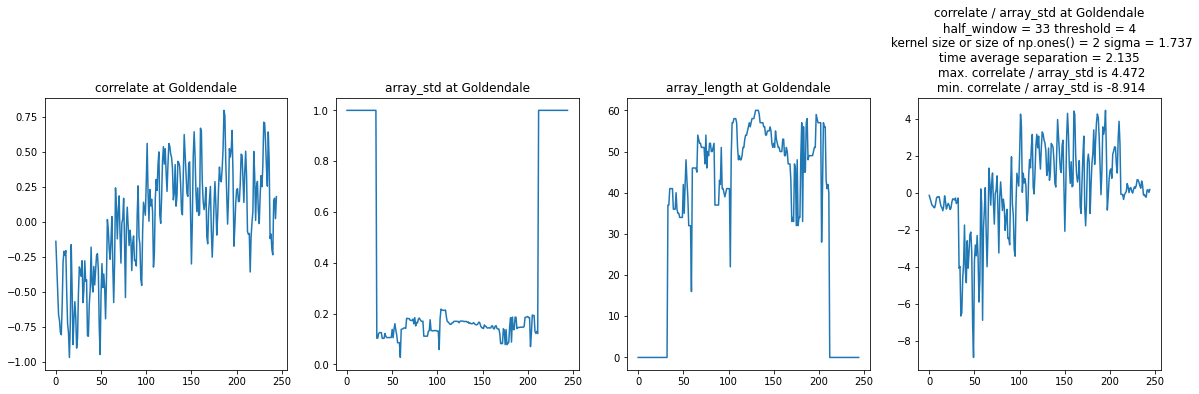

maximum safe_div(correlate, array_std) 4.4721292408276545  at np.argmax(safe_div(correlate, array_std)) 195
list_mask [101, 153, 160, 161, 186, 187, 195]
Possible detection in Goldendale, in time : [18746.998 18858.048 18872.988 18875.128 18928.518 18930.648 18947.738]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.20610195334189643
std_norm_flux 0.1378076016905981
sigma = std cross-correlation / std norm flux 1.495577535734429
threshold 30


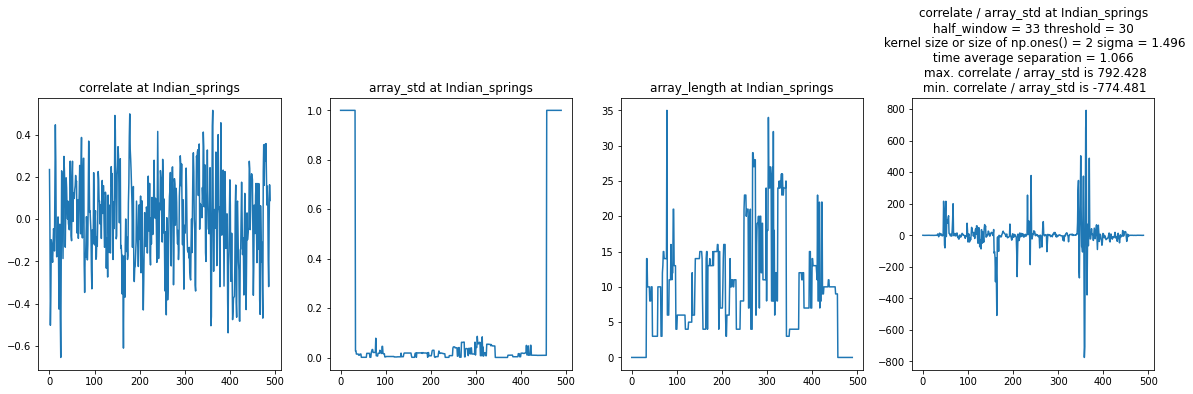

maximum safe_div(correlate, array_std) 792.428226477087  at np.argmax(safe_div(correlate, array_std)) 362
list_mask [46, 47, 50, 51, 53, 54, 55, 56, 57, 65, 66, 67, 98, 108, 109, 117, 119, 120, 124, 125, 130, 136, 137, 138, 139, 157, 193, 232, 235, 236, 239, 240, 266, 267, 343, 344, 345, 348, 349, 350, 351, 355, 356, 361, 362, 363, 366, 368, 369, 374, 380, 384, 385, 389, 443]
Possible detection in Indian_springs, in time : [18445.414 18446.484 18449.684 18450.754 18452.894 18453.954 18455.024
 18456.094 18457.164 18465.704 18466.764 18467.834 18500.934 18511.614
 18512.684 18521.224 18523.354 18524.424 18528.694 18529.764 18535.104
 18541.514 18542.574 18543.644 18544.714 18563.934 18602.374 18644.014
 18647.214 18648.284 18651.484 18652.554 18680.314 18681.384 18762.534
 18763.594 18764.664 18767.864 18768.934 18770.004 18771.074 18775.344
 18776.414 18781.754 18782.814 18783.884 18787.084 18789.224 18790.294
 18795.634 18802.034 18806.304 18807.374 18811.644 18869.304]
--------------

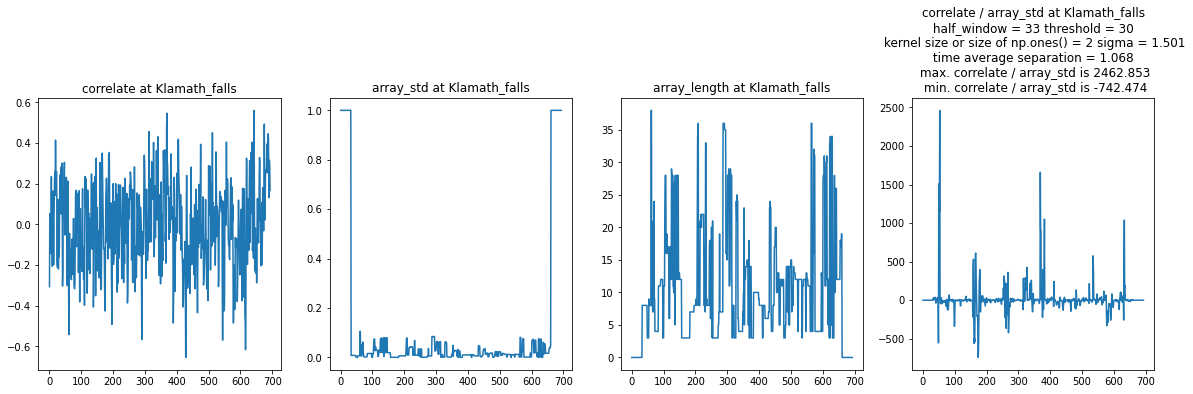

maximum safe_div(correlate, array_std) 2462.852918870965  at np.argmax(safe_div(correlate, array_std)) 53
list_mask [35, 36, 39, 46, 47, 50, 51, 52, 53, 58, 82, 83, 136, 158, 159, 165, 166, 167, 168, 177, 178, 179, 180, 182, 186, 187, 188, 200, 253, 255, 256, 257, 259, 260, 263, 264, 267, 316, 322, 323, 324, 325, 326, 327, 336, 337, 339, 340, 341, 342, 347, 369, 370, 371, 377, 381, 382, 404, 405, 412, 431, 445, 482, 504, 523, 535, 536, 547, 556, 561, 568, 569, 576, 594, 621, 623, 628, 632, 633, 634, 635]
Possible detection in Klamath_falls, in time : [18272.894 18273.964 18277.174 18284.644 18285.714 18288.914 18289.984
 18291.054 18292.114 18297.454 18323.084 18324.154 18380.734 18404.234
 18405.294 18411.704 18412.774 18413.834 18414.904 18424.514 18425.584
 18426.654 18427.724 18429.854 18434.124 18435.194 18436.264 18449.074
 18505.664 18507.804 18508.864 18509.934 18512.074 18513.134 18516.344
 18517.414 18520.614 18572.924 18579.334 18580.404 18581.474 18582.544
 18583.614 18584.

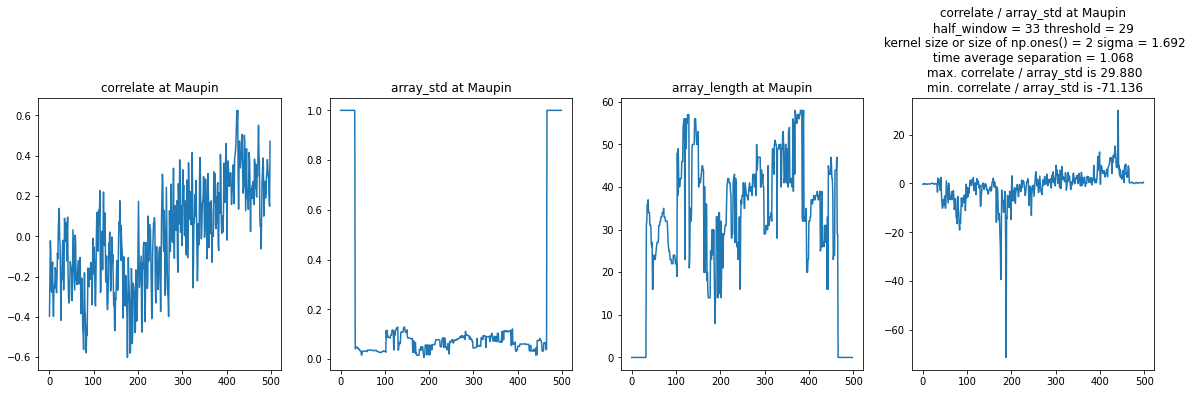

maximum safe_div(correlate, array_std) 29.87968334741973  at np.argmax(safe_div(correlate, array_std)) 441
list_mask [441]
Possible detection in Maupin, in time : [18877.974]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.249378908866849
std_norm_flux 0.16414524211112588
sigma = std cross-correlation / std norm flux 1.519257613924747
threshold 30


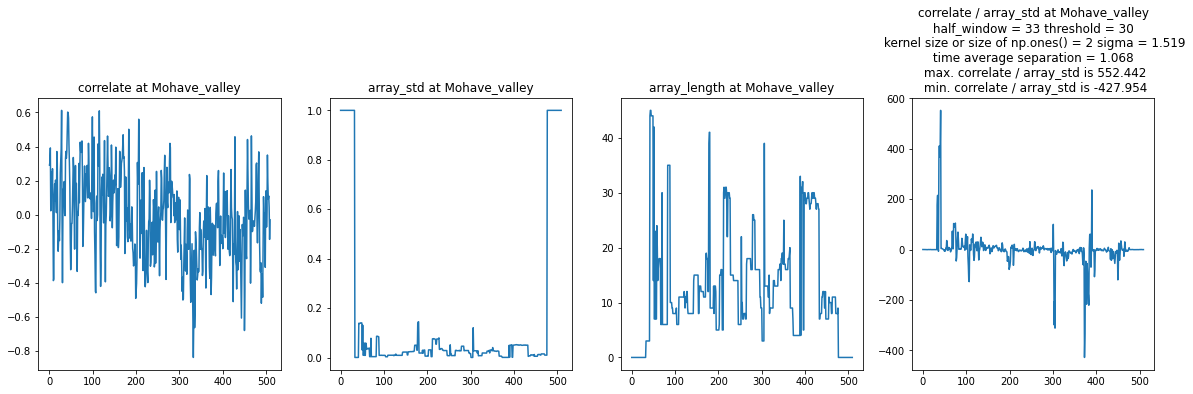

maximum safe_div(correlate, array_std) 552.4420506677551  at np.argmax(safe_div(correlate, array_std)) 41
list_mask [33, 34, 37, 38, 39, 40, 41, 55, 68, 71, 72, 73, 74, 75, 76, 80, 81, 82, 90, 91, 98, 99, 103, 112, 114, 115, 116, 123, 127, 133, 134, 135, 247, 258, 301, 385, 386, 390, 457, 466]
Possible detection in Mohave_valley, in time : [18406.644 18407.714 18410.914 18411.984 18413.054 18414.124 18415.184
 18430.134 18444.014 18447.224 18448.284 18449.354 18450.424 18451.494
 18452.564 18456.824 18457.894 18458.964 18467.504 18468.574 18476.044
 18477.114 18481.384 18490.994 18493.134 18494.204 18495.264 18502.744
 18507.014 18513.414 18514.484 18515.554 18635.144 18646.884 18692.804
 18782.484 18783.554 18787.824 18859.364 18868.974]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.17145508924199343
std_norm_flux 0.11027922160658381
sigma = std cross-correlation / std norm flux 1.55473

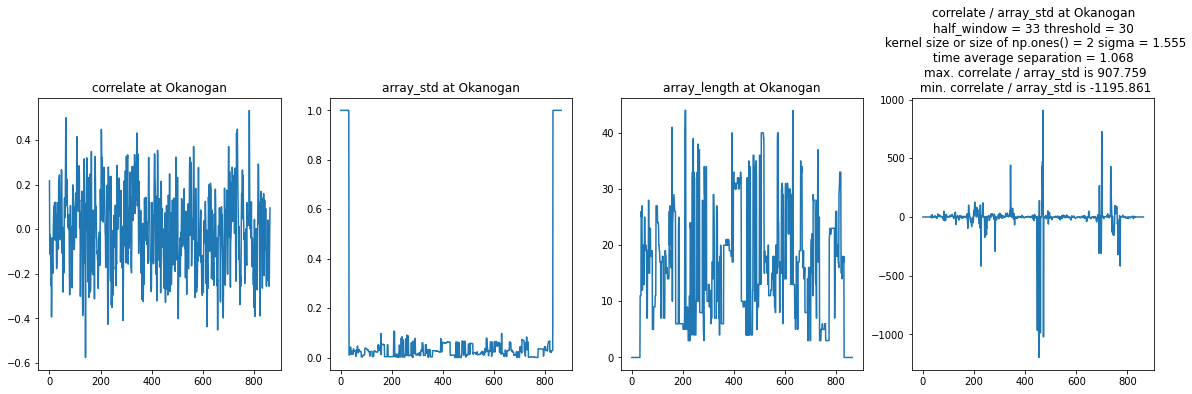

maximum safe_div(correlate, array_std) 907.7588519717604  at np.argmax(safe_div(correlate, array_std)) 470
list_mask [82, 125, 127, 178, 179, 180, 182, 199, 200, 202, 203, 204, 205, 206, 212, 213, 214, 215, 216, 224, 225, 234, 235, 301, 324, 331, 341, 343, 344, 351, 456, 466, 467, 468, 469, 470, 471, 489, 495, 496, 649, 650, 690, 691, 700, 735, 736, 737, 738, 739, 751, 752, 754, 755, 756, 757, 758, 759, 760]
Possible detection in Okanogan, in time : [18189.684 18235.604 18237.734 18292.194 18293.264 18294.324 18296.464
 18314.614 18315.684 18317.814 18318.884 18319.954 18321.014 18322.084
 18328.494 18329.564 18330.624 18331.694 18332.764 18341.304 18342.374
 18351.984 18353.054 18423.524 18448.084 18455.554 18466.234 18468.364
 18469.434 18476.904 18589.014 18599.694 18600.764 18601.834 18602.894
 18603.964 18605.034 18624.254 18630.664 18631.724 18795.094 18796.154
 18838.864 18839.934 18849.544 18886.914 18887.984 18889.054 18890.114
 18891.184 18903.994 18905.064 18907.204 18908.27

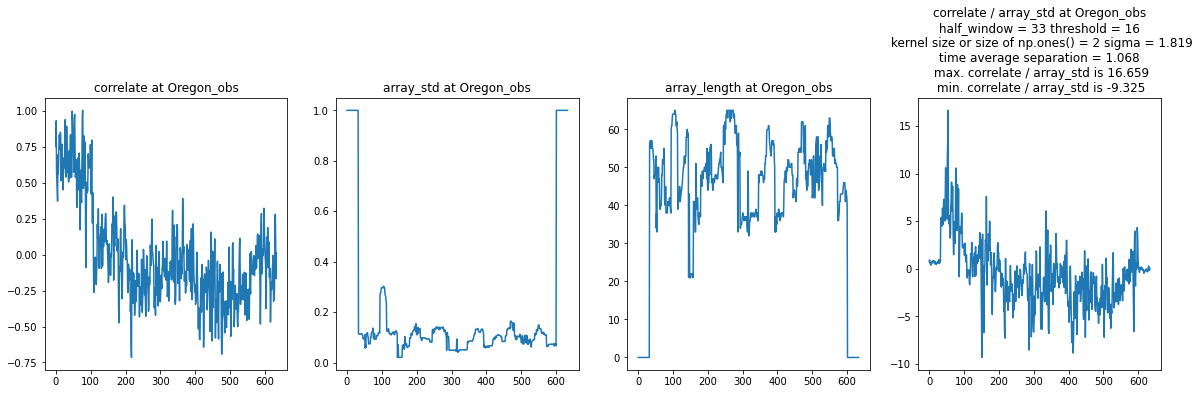

maximum safe_div(correlate, array_std) 16.658807935711675  at np.argmax(safe_div(correlate, array_std)) 54
list_mask [54]
Possible detection in Oregon_obs, in time : [18373.454]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.14531002421575012
std_norm_flux 0.09775810947071388
sigma = std cross-correlation / std norm flux 1.4864242465662834
threshold 30


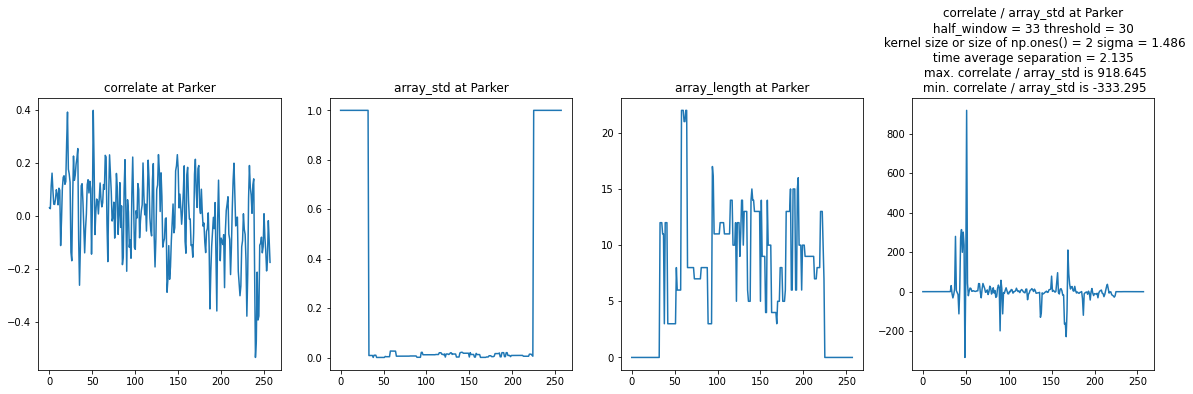

maximum safe_div(correlate, array_std) 918.6449939993062  at np.argmax(safe_div(correlate, array_std)) 51
list_mask [33, 38, 44, 45, 46, 47, 48, 50, 51, 52, 65, 66, 70, 88, 91, 150, 156, 157, 169, 170, 171, 215]
Possible detection in Parker, in time : [18445.988 18456.658 18469.478 18471.608 18473.748 18475.878 18478.018
 18482.288 18484.418 18486.558 18514.318 18516.448 18524.998 18563.438
 18569.838 18695.828 18708.648 18710.778 18736.408 18738.538 18740.678
 18834.638]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.14610343843158752
std_norm_flux 0.08920128937778901
sigma = std cross-correlation / std norm flux 1.6379072483224335
threshold 30


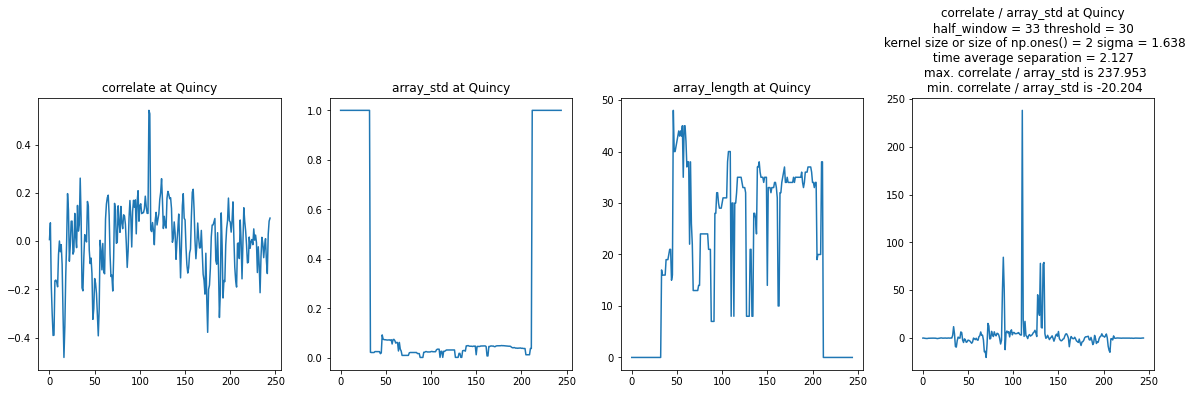

maximum safe_div(correlate, array_std) 237.9532856162468  at np.argmax(safe_div(correlate, array_std)) 110
list_mask [88, 89, 90, 110, 127, 130, 133, 134]
Possible detection in Quincy, in time : [18598.96 18601.095 18603.23 18645.942 18682.242 18688.649 18695.056
 18697.191]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.19247058478278875
std_norm_flux 0.1285539277124569
sigma = std cross-correlation / std norm flux 1.497197232380931
threshold 30


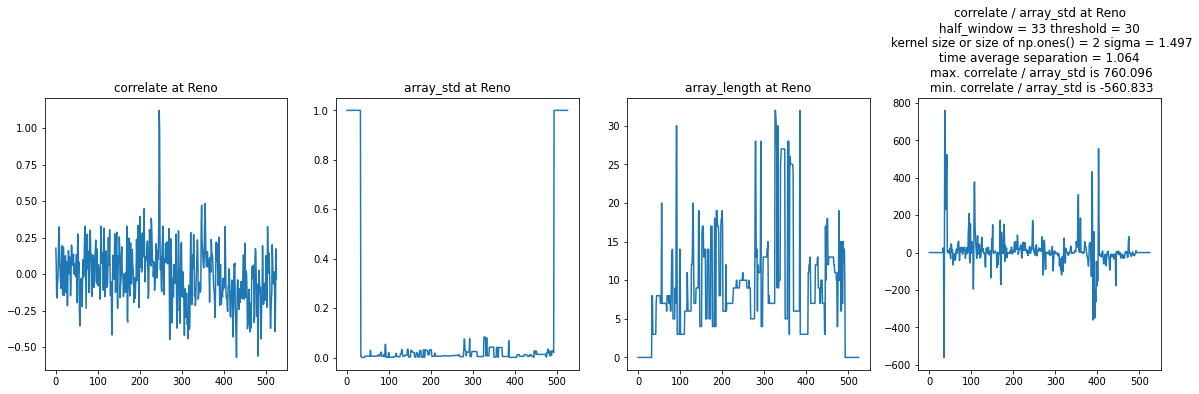

maximum safe_div(correlate, array_std) 760.0957600961826  at np.argmax(safe_div(correlate, array_std)) 37
list_mask [37, 38, 39, 40, 41, 42, 52, 53, 68, 69, 70, 93, 94, 95, 98, 101, 102, 107, 108, 109, 110, 111, 115, 119, 120, 125, 149, 150, 151, 169, 172, 177, 178, 179, 181, 196, 203, 206, 207, 210, 211, 217, 218, 222, 223, 224, 227, 228, 239, 245, 246, 247, 248, 254, 255, 268, 269, 273, 274, 293, 321, 337, 350, 351, 353, 354, 355, 360, 370, 371, 372, 373, 381, 382, 384, 387, 388, 392, 403, 404, 474, 475]
Possible detection in Reno, in time : [18418.26 18419.327 18420.393 18421.461 18422.53 18423.597 18434.274
 18435.342 18451.36 18452.425 18453.493 18478.051 18479.119 18480.186
 18483.39 18486.595 18487.66 18493.0 18494.067 18495.137 18496.204
 18497.27 18501.542 18505.814 18506.879 18512.219 18537.844 18538.914
 18539.981 18559.2 18562.402 18567.74 18568.809 18569.878 18572.013
 18588.028 18595.502 18598.705 18599.774 18602.978 18604.044 18610.453
 18611.517 18615.79 18616.86 18617.

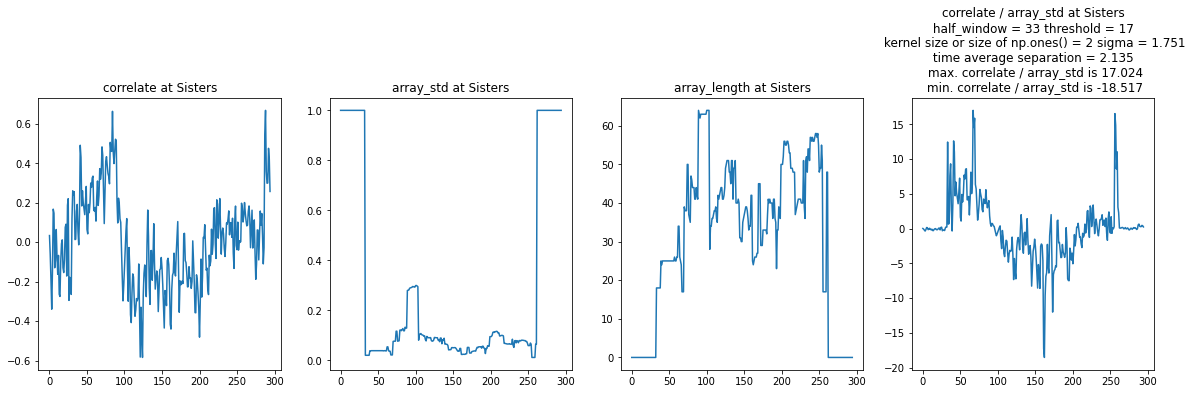

maximum safe_div(correlate, array_std) 17.023812586091786  at np.argmax(safe_div(correlate, array_std)) 67
list_mask [67]
Possible detection in Sisters, in time : [18473.968]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 2.660810521104962
std_norm_flux 1.9202848518848066
sigma = std cross-correlation / std norm flux 1.3856332400337956
threshold 30


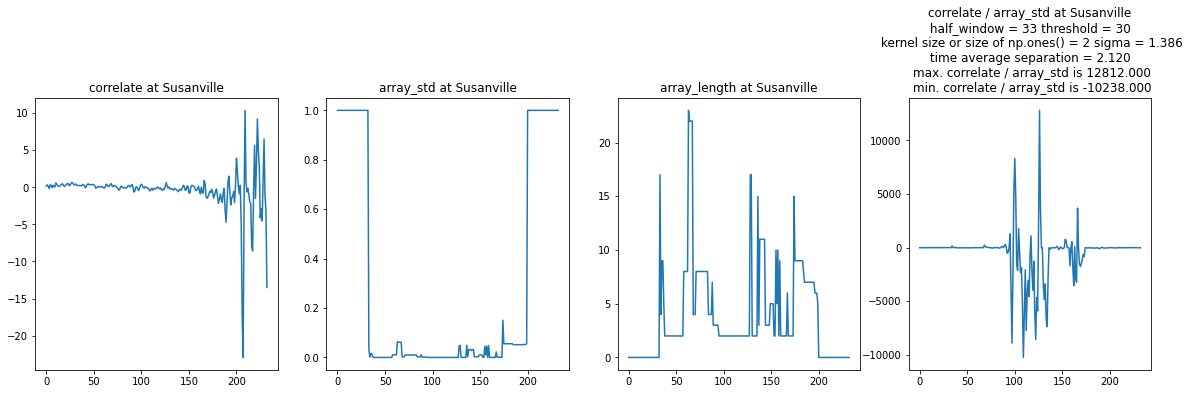

maximum safe_div(correlate, array_std) 12812.00000000141  at np.argmax(safe_div(correlate, array_std)) 126
list_mask [34, 37, 68, 69, 70, 86, 87, 89, 90, 91, 95, 99, 100, 101, 104, 117, 125, 126, 127, 144, 145, 148, 153, 154, 160, 163, 166]
Possible detection in Susanville, in time : [18476.294 18482.701 18548.899 18551.036 18553.171 18587.339 18589.474
 18593.746 18595.881 18598.016 18606.558 18615.099 18617.236 18619.369
 18625.776 18653.539 18670.622 18672.757 18674.892 18711.195 18713.332
 18719.739 18730.416 18732.551 18745.364 18751.769 18758.176]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 2.67053279627404
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.3878613896986418
threshold 30


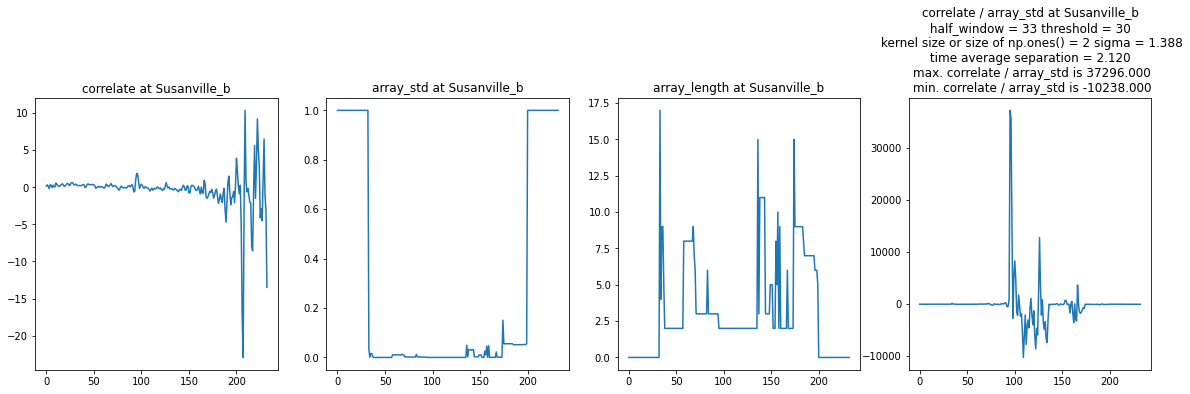

maximum safe_div(correlate, array_std) 37296.00000000411  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [34, 37, 63, 68, 71, 72, 73, 79, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 99, 100, 101, 104, 117, 125, 126, 127, 129, 144, 145, 148, 152, 153, 154, 160, 163, 166]
Possible detection in Susanville_b, in time : [18476.294 18482.701 18538.223 18548.899 18555.306 18557.443 18559.578
 18572.39 18587.339 18589.474 18591.609 18593.746 18595.881 18598.016
 18604.424 18606.558 18608.693 18610.831 18615.099 18617.236 18619.369
 18625.776 18653.539 18670.622 18672.757 18674.892 18679.164 18711.195
 18713.332 18719.739 18728.279 18730.416 18732.551 18745.364 18751.769
 18758.176]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 2.767193911907672
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.4380956464957442
threshold 30


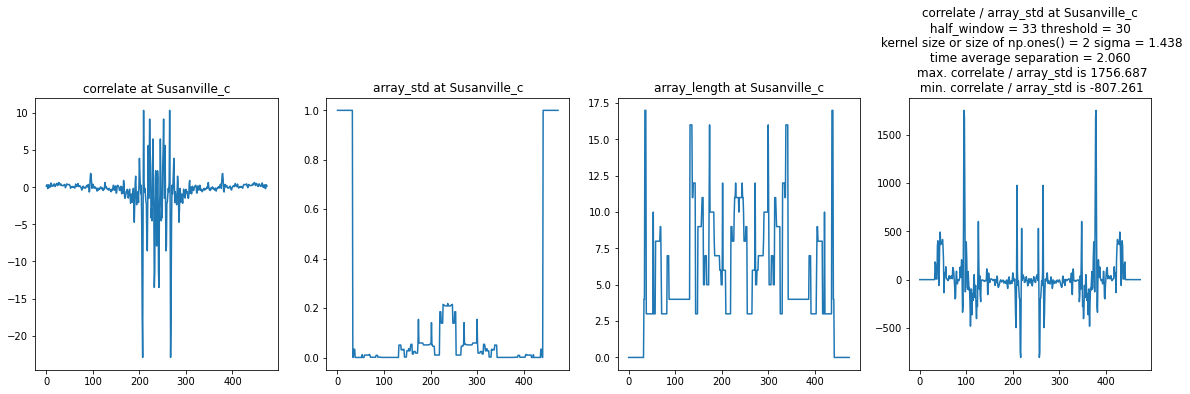

maximum safe_div(correlate, array_std) 1756.687004358324  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [33, 34, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 63, 68, 71, 72, 73, 79, 87, 89, 90, 91, 94, 95, 96, 97, 99, 100, 101, 104, 117, 125, 126, 127, 129, 144, 145, 148, 166, 200, 201, 209, 210, 219, 222, 223, 229, 245, 251, 252, 255, 264, 265, 273, 274, 308, 326, 329, 330, 345, 347, 348, 349, 357, 370, 373, 374, 375, 377, 378, 379, 380, 383, 384, 385, 387, 395, 401, 402, 403, 406, 411, 418, 419, 420, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 434, 435, 436, 440, 441]
Possible detection in Susanville_c, in time : [18474.159 18476.294 18484.834 18486.971 18489.108 18493.378 18495.513
 18497.65 18499.785 18501.92 18504.055 18506.19 18508.327 18510.462
 18512.597 18519.004 18521.141 18523.274 18538.223 18548.899 18555.306
 18557.443 18559.578 18572.39 18589.474 18593.746 18595.881 18598.016
 18604.424 18606.558 18608.693 18610.831 18615.099 18617.236

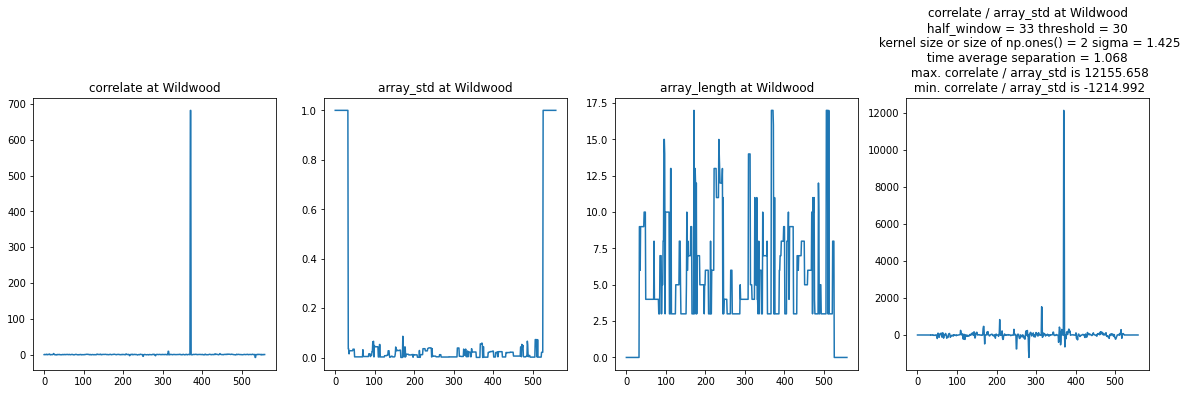

maximum safe_div(correlate, array_std) 12155.658123560921  at np.argmax(safe_div(correlate, array_std)) 370
list_mask [52, 53, 56, 57, 58, 60, 64, 71, 72, 79, 80, 81, 109, 110, 114, 118, 134, 135, 138, 139, 140, 143, 144, 148, 149, 150, 151, 166, 167, 168, 176, 178, 179, 186, 187, 188, 199, 207, 208, 209, 211, 214, 220, 244, 248, 254, 274, 275, 277, 278, 284, 285, 286, 287, 290, 291, 292, 293, 299, 300, 303, 306, 307, 314, 315, 319, 320, 322, 323, 329, 342, 343, 344, 358, 359, 360, 364, 365, 366, 370, 371, 377, 378, 379, 381, 382, 383, 384, 385, 386, 401, 407, 408, 419, 425, 430, 432, 433, 436, 444, 445, 455, 456, 457, 458, 459, 460, 462, 463, 464, 465, 466, 467, 468, 471, 476, 477, 488, 491, 492, 494, 495, 511, 513, 514, 515, 519, 520, 521]
Possible detection in Wildwood, in time : [18415.024 18416.094 18419.294 18420.364 18421.424 18423.564 18427.834
 18435.314 18436.384 18443.854 18444.924 18445.984 18475.884 18476.954
 18481.224 18485.494 18502.584 18503.644 18506.844 18507.914 185

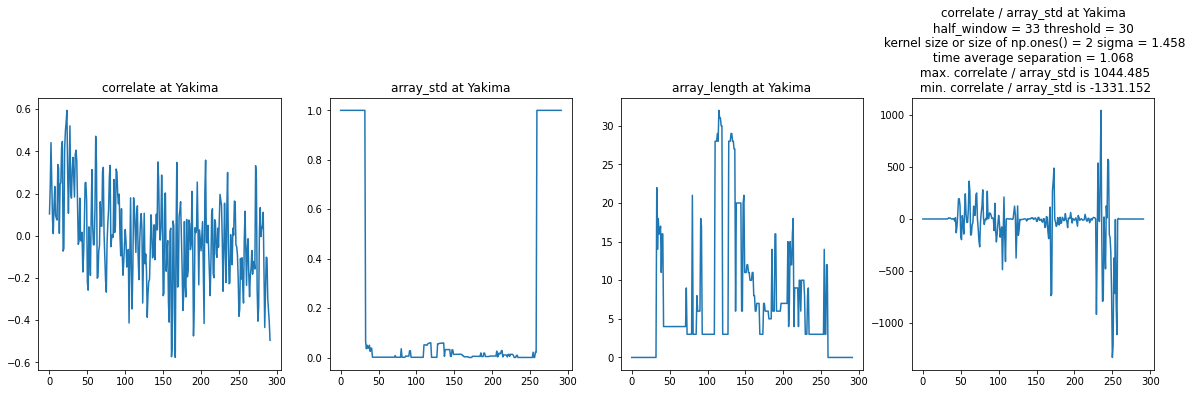

maximum safe_div(correlate, array_std) 1044.485034113159  at np.argmax(safe_div(correlate, array_std)) 235
list_mask [46, 47, 48, 49, 52, 55, 56, 57, 60, 61, 62, 67, 68, 69, 70, 71, 77, 78, 79, 85, 88, 89, 90, 95, 100, 107, 120, 121, 122, 125, 168, 171, 172, 173, 188, 195, 205, 214, 231, 234, 235, 242, 244, 245]
Possible detection in Yakima, in time : [18727.994 18729.064 18730.134 18731.194 18734.404 18737.604 18738.674
 18739.734 18742.944 18744.014 18745.074 18750.414 18751.484 18752.554
 18753.614 18754.684 18761.094 18762.164 18763.234 18769.634 18772.834
 18773.904 18774.974 18780.314 18785.654 18793.124 18807.004 18808.074
 18809.144 18812.344 18858.254 18861.464 18862.534 18863.594 18879.614
 18887.084 18897.764 18907.374 18925.524 18928.734 18929.794 18937.274
 18939.404 18940.474]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 2
std_correlate 0.243025470114274
std_norm_flux 0.16072292579244396
si

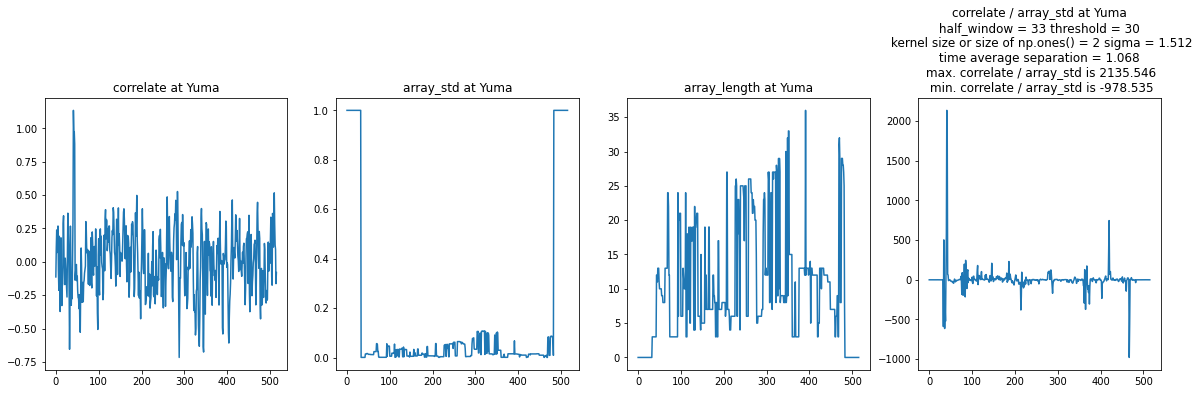

maximum safe_div(correlate, array_std) 2135.5458327877714  at np.argmax(safe_div(correlate, array_std)) 41
list_mask [34, 39, 40, 41, 42, 43, 44, 74, 77, 82, 85, 86, 89, 90, 100, 103, 104, 112, 113, 116, 118, 121, 122, 131, 133, 142, 146, 148, 157, 160, 164, 181, 186, 189, 201, 202, 203, 216, 226, 277, 278, 279, 280, 281, 283, 284, 285, 340, 363, 368, 411, 412, 419, 420, 421, 422, 423, 451]
Possible detection in Yuma, in time : [18400.106 18405.586 18406.52 18467.622 18408.69 18349.756 18410.8
 18442.815 18446.01 18451.349 18454.543 18455.62 18458.831 18459.882
 18470.559 18473.771 18474.847 18483.381 18484.449 18487.652 18489.787
 18492.99 18494.058 18503.668 18505.803 18515.413 18519.684 18521.819
 18531.429 18534.632 18538.911 18557.055 18562.393 18565.604 18578.409
 18579.494 18580.545 18594.433 18605.111 18659.548 18660.625 18661.692
 18662.76 18663.836 18665.963 18667.031 18668.099 18726.824 18751.39
 18756.729 18802.633 18803.701 18811.166 18812.243 18813.311 18814.379
 18815.45

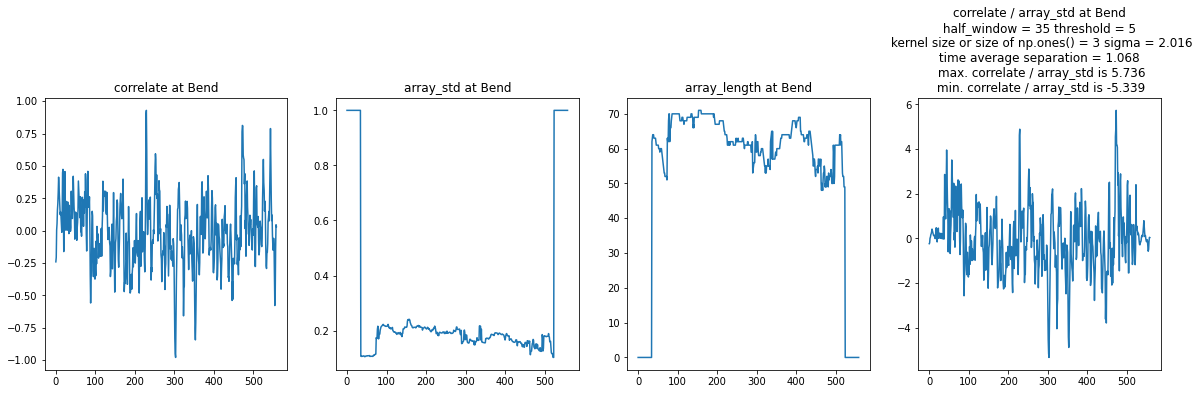

maximum safe_div(correlate, array_std) 5.7356917818330615  at np.argmax(safe_div(correlate, array_std)) 473
list_mask [473]
Possible detection in Bend, in time : [18895.014]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.5842679795998345
std_norm_flux 0.20237887784074302
sigma = std cross-correlation / std norm flux 2.887000787007078
threshold 3


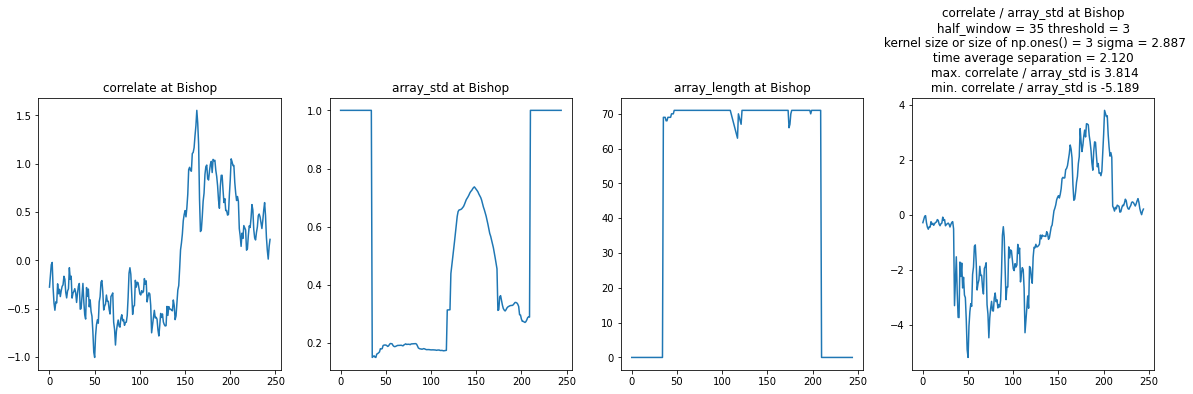

maximum safe_div(correlate, array_std) 3.814024895500998  at np.argmax(safe_div(correlate, array_std)) 201
list_mask [174, 179, 181, 182, 183, 201, 202, 203, 204]
Possible detection in Bishop, in time : [18771.708 18782.388 18786.648 18788.788 18790.928 18829.368 18831.498
 18833.638 18835.778]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.3239594829078389
std_norm_flux 0.17587123625700551
sigma = std cross-correlation / std norm flux 1.8420265291956435
threshold 6


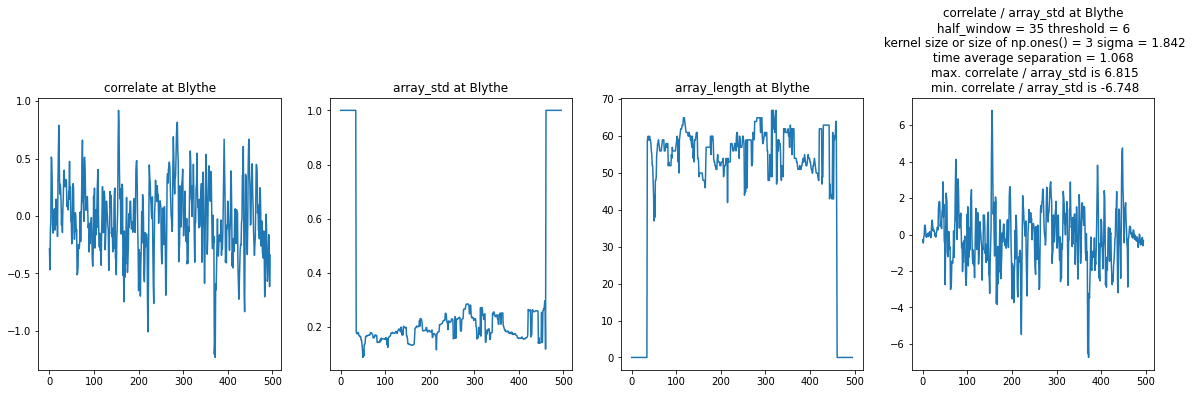

maximum safe_div(correlate, array_std) 6.814797194122465  at np.argmax(safe_div(correlate, array_std)) 155
list_mask [155]
Possible detection in Blythe, in time : [18547.744]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.17997692258021755
std_norm_flux 0.09521950449101106
sigma = std cross-correlation / std norm flux 1.890126645189671
threshold 6


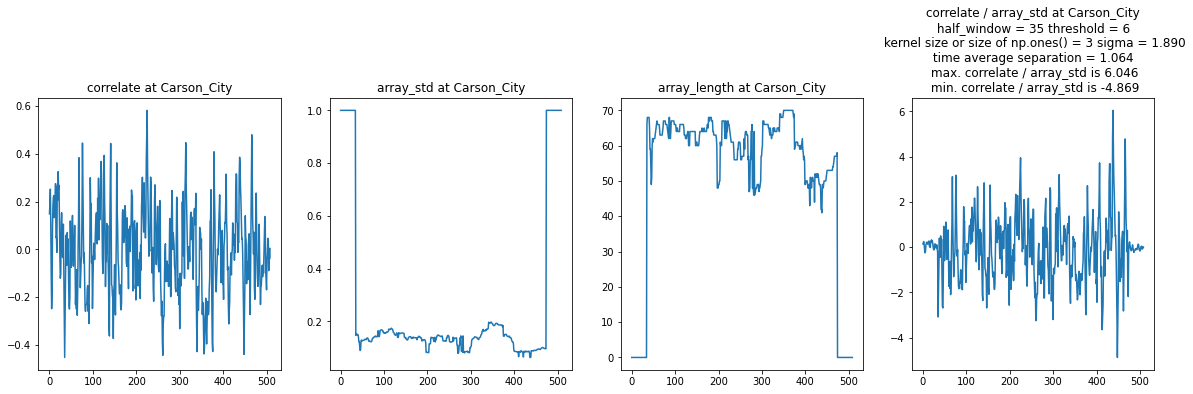

maximum safe_div(correlate, array_std) 6.04577673097315  at np.argmax(safe_div(correlate, array_std)) 438
list_mask [438]
Possible detection in Carson_City, in time : [18869.115]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.437757749208494
std_norm_flux 0.2019605857474751
sigma = std cross-correlation / std norm flux 2.1675405009760267
threshold 3


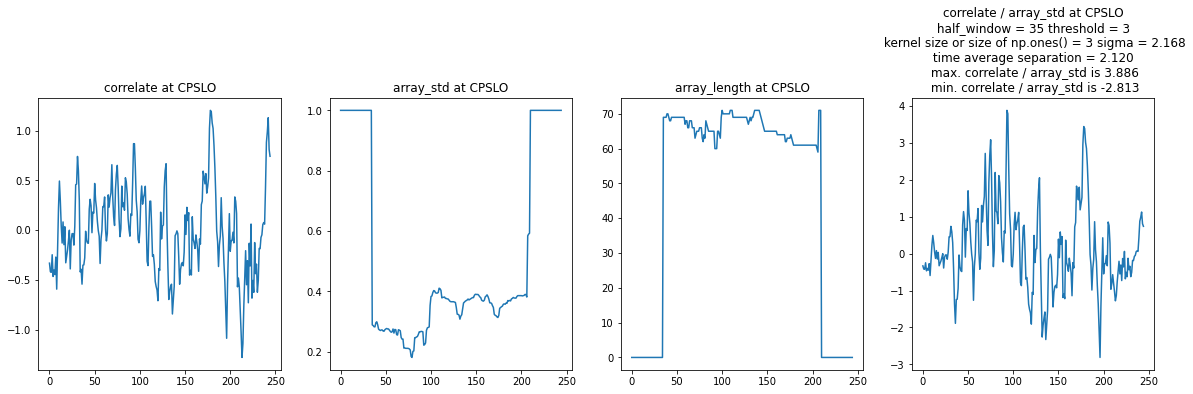

maximum safe_div(correlate, array_std) 3.8864876172776364  at np.argmax(safe_div(correlate, array_std)) 93
list_mask [75, 93, 94, 178, 179, 180]
Possible detection in CPSLO, in time : [18568.298 18606.728 18608.868 18788.248 18790.388 18792.518]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.46423295383338975
std_norm_flux 0.22939567213016832
sigma = std cross-correlation / std norm flux 2.023721500595553
threshold 7


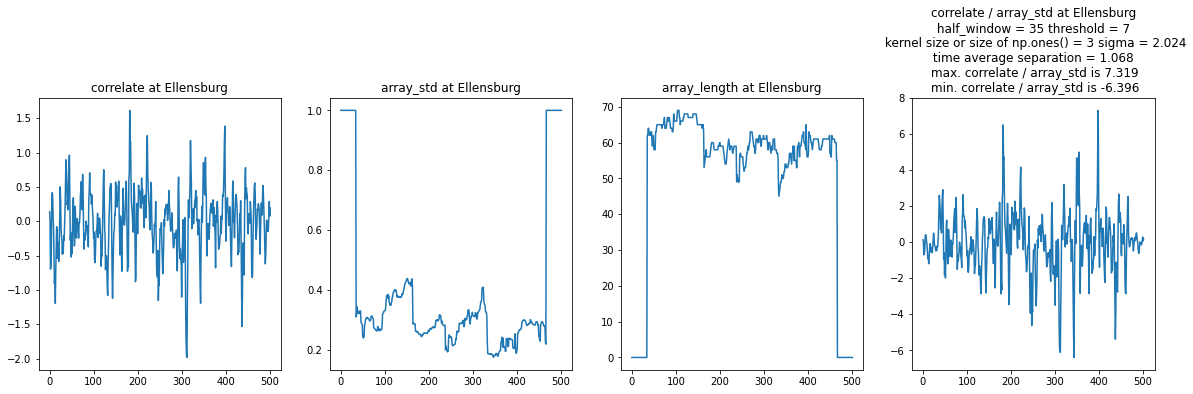

maximum safe_div(correlate, array_std) 7.319260008202383  at np.argmax(safe_div(correlate, array_std)) 398
list_mask [398]
Possible detection in Ellensburg, in time : [18832.244]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.5453572608948345
std_norm_flux 0.22184102699731292
sigma = std cross-correlation / std norm flux 2.4583246312749902
threshold 3


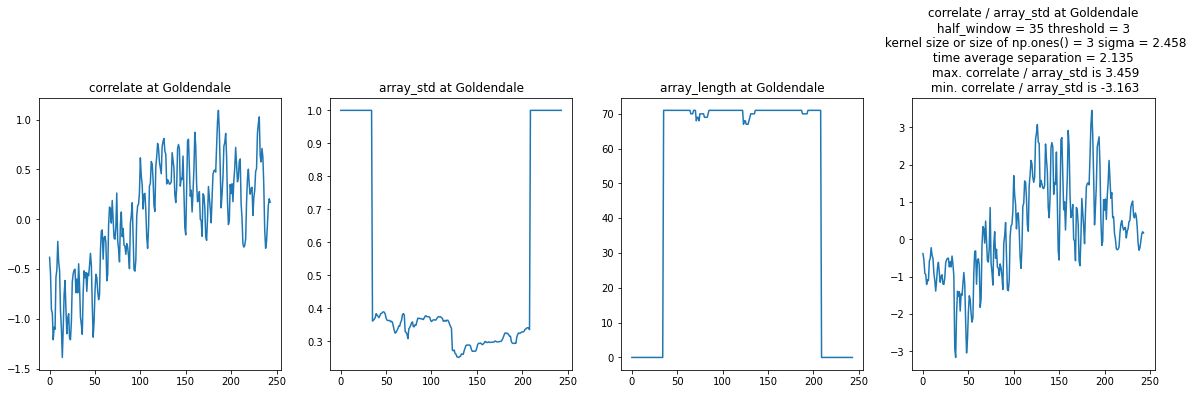

maximum safe_div(correlate, array_std) 3.4587753618133066  at np.argmax(safe_div(correlate, array_std)) 186
list_mask [126, 185, 186]
Possible detection in Goldendale, in time : [18802.518 18928.518 18930.648]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.2561962473533214
std_norm_flux 0.1378076016905981
sigma = std cross-correlation / std norm flux 1.859086467004384
threshold 4


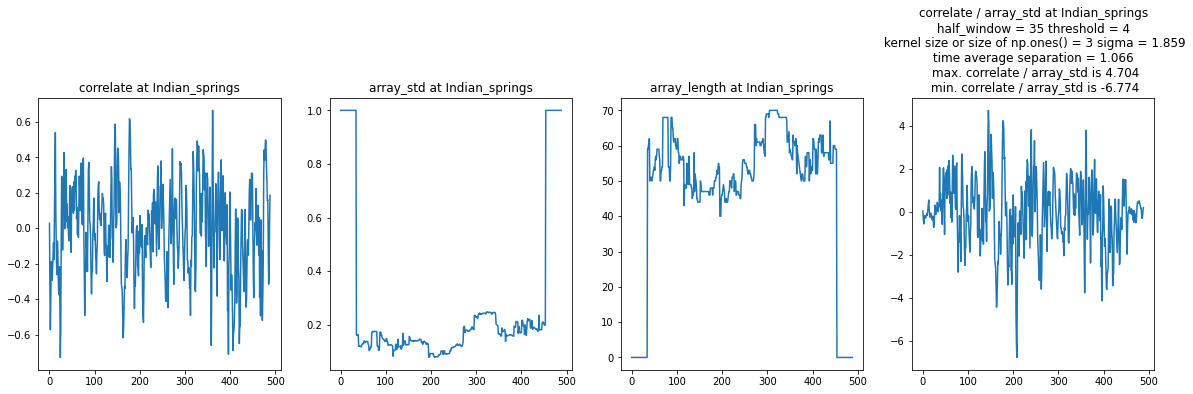

maximum safe_div(correlate, array_std) 4.704010649078725  at np.argmax(safe_div(correlate, array_std)) 145
list_mask [145, 146, 177, 178]
Possible detection in Indian_springs, in time : [18552.194 18553.254 18586.354 18587.424]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.26017649811693166
std_norm_flux 0.1380105245335426
sigma = std cross-correlation / std norm flux 1.8851931691173118
threshold 6


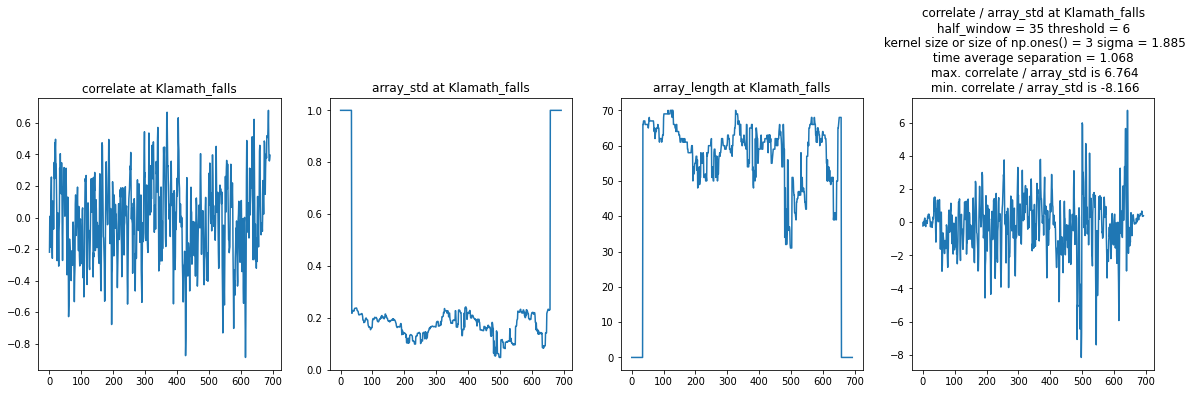

maximum safe_div(correlate, array_std) 6.763676974161953  at np.argmax(safe_div(correlate, array_std)) 642
list_mask [500, 642]
Possible detection in Klamath_falls, in time : [18770.464 18922.084]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.34673948585035036
std_norm_flux 0.14554610160413653
sigma = std cross-correlation / std norm flux 2.3823344083335845
threshold 6


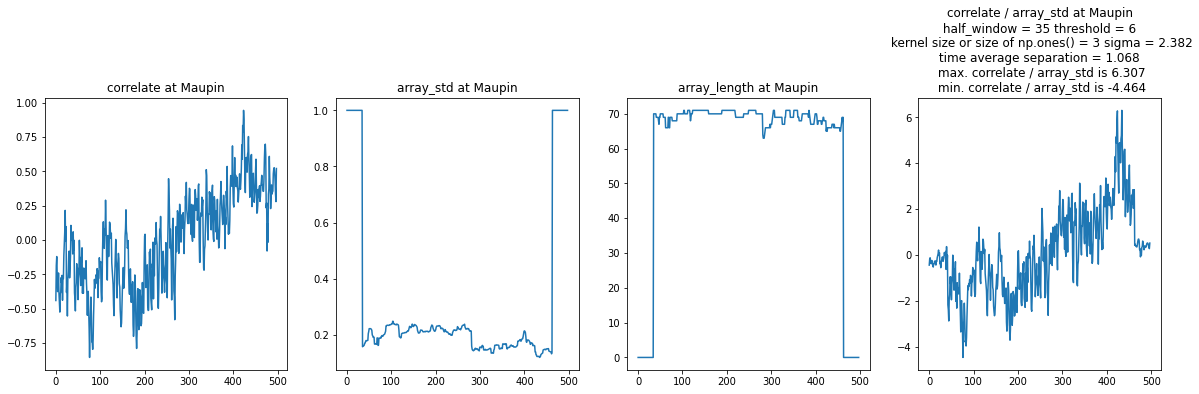

maximum safe_div(correlate, array_std) 6.306692433694649  at np.argmax(safe_div(correlate, array_std)) 434
list_mask [424, 434]
Possible detection in Maupin, in time : [18860.894 18871.574]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.3302560913675037
std_norm_flux 0.16414524211112588
sigma = std cross-correlation / std norm flux 2.0119748042646357
threshold 5


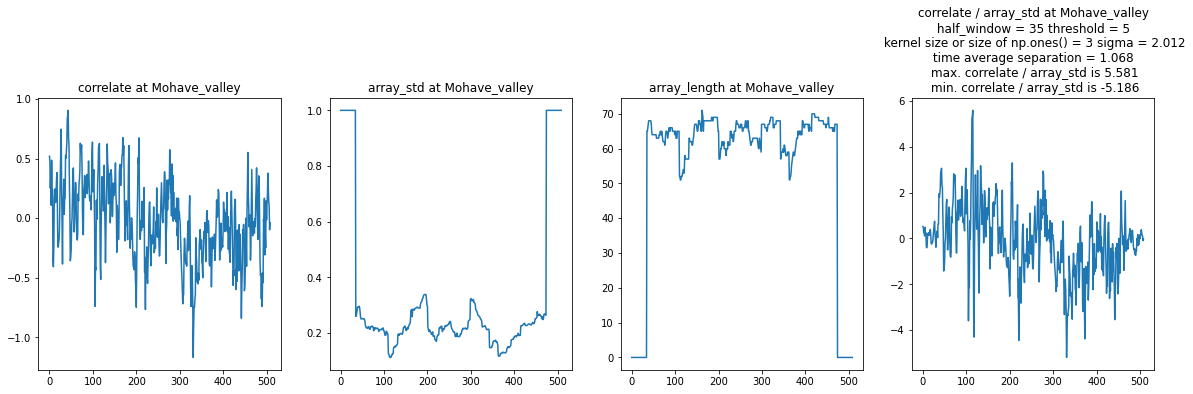

maximum safe_div(correlate, array_std) 5.581188496777102  at np.argmax(safe_div(correlate, array_std)) 115
list_mask [113, 114, 115]
Possible detection in Mohave_valley, in time : [18493.134 18494.204 18495.264]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.22250621351202524
std_norm_flux 0.11027922160658381
sigma = std cross-correlation / std norm flux 2.0176621694502543
threshold 4


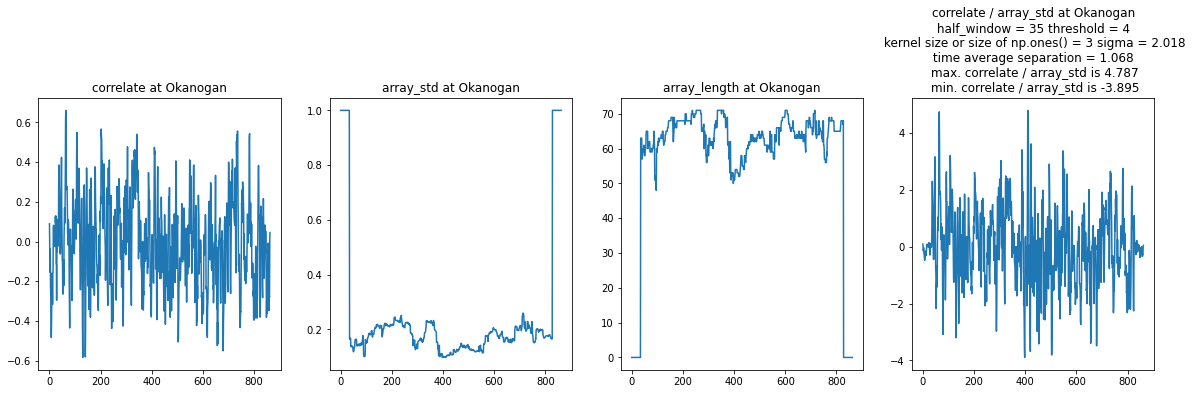

maximum safe_div(correlate, array_std) 4.787101709167412  at np.argmax(safe_div(correlate, array_std)) 410
list_mask [63, 64, 410, 411, 412]
Possible detection in Okanogan, in time : [18170.464 18171.534 18540.974 18542.034 18543.104]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.4982296999130013
std_norm_flux 0.19011149253937454
sigma = std cross-correlation / std norm flux 2.620723730364757
threshold 6


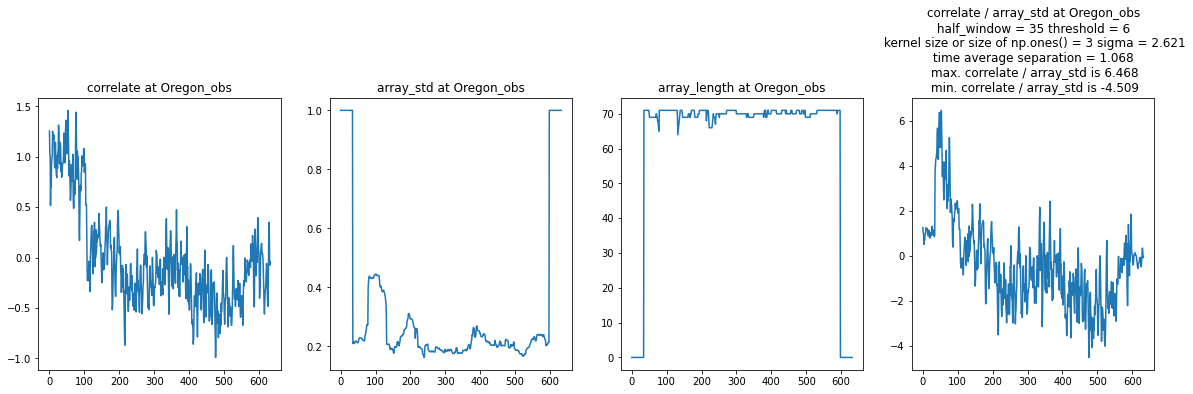

maximum safe_div(correlate, array_std) 6.46836078332791  at np.argmax(safe_div(correlate, array_std)) 53
list_mask [47, 48, 53]
Possible detection in Oregon_obs, in time : [18367.054 18368.114 18373.454]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.18721471402739573
std_norm_flux 0.09775810947071388
sigma = std cross-correlation / std norm flux 1.9150811635067577
threshold 4


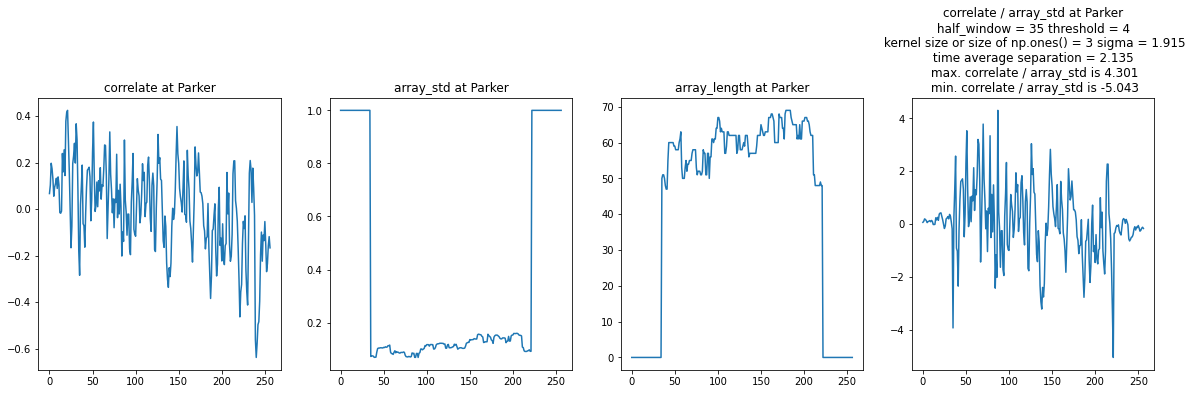

maximum safe_div(correlate, array_std) 4.301277048652129  at np.argmax(safe_div(correlate, array_std)) 87
list_mask [87]
Possible detection in Parker, in time : [18563.438]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.19674898404580976
std_norm_flux 0.08920128937778901
sigma = std cross-correlation / std norm flux 2.205674216350509
threshold 7


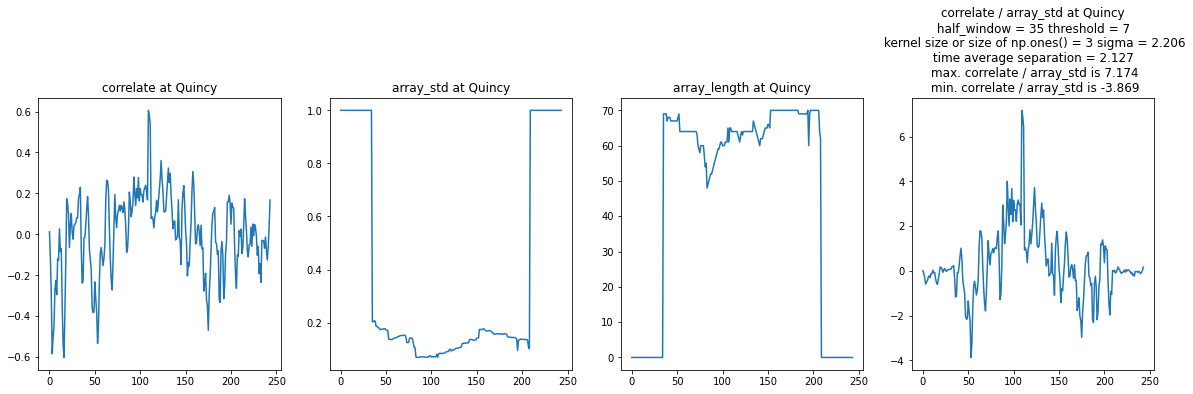

maximum safe_div(correlate, array_std) 7.174238815855688  at np.argmax(safe_div(correlate, array_std)) 109
list_mask [109]
Possible detection in Quincy, in time : [18645.942]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.2434318643190354
std_norm_flux 0.1285539277124569
sigma = std cross-correlation / std norm flux 1.8936166996276598
threshold 9


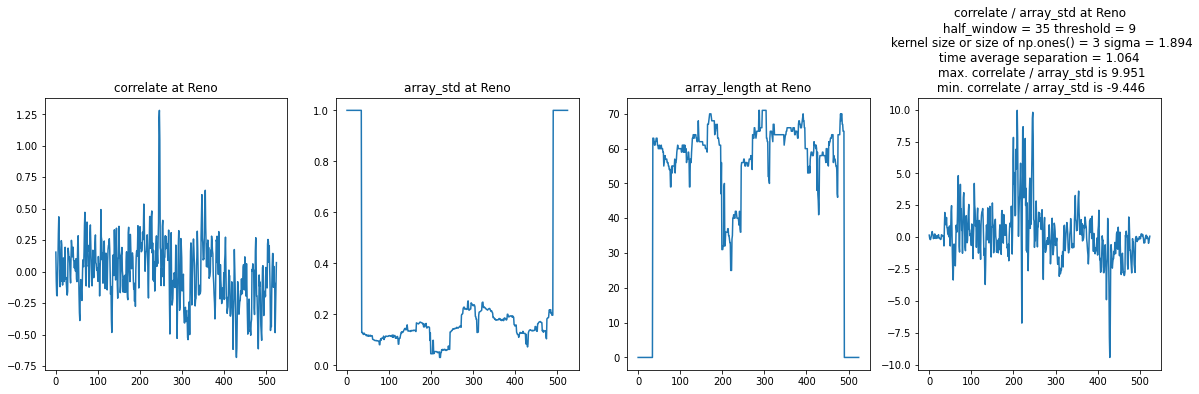

maximum safe_div(correlate, array_std) 9.951437124895746  at np.argmax(safe_div(correlate, array_std)) 209
list_mask [209, 245, 246]
Possible detection in Reno, in time : [18602.978 18641.416 18642.483]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.32453466241111806
std_norm_flux 0.13170757531223723
sigma = std cross-correlation / std norm flux 2.464054642580341
threshold 2


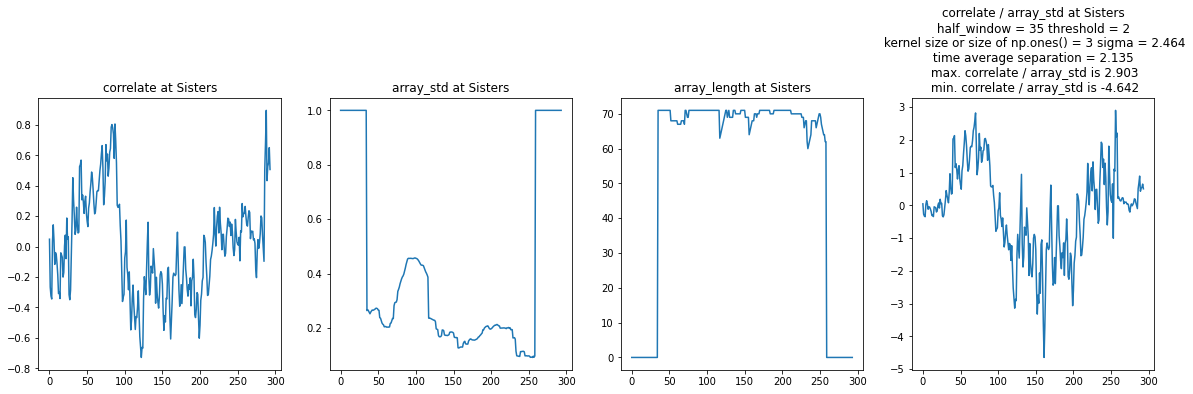

maximum safe_div(correlate, array_std) 2.9029473630291274  at np.argmax(safe_div(correlate, array_std)) 256
list_mask [40, 41, 42, 56, 57, 67, 68, 69, 70, 75, 82, 83, 256, 257, 258]
Possible detection in Sisters, in time : [18418.448 18420.588 18422.718 18452.618 18454.758 18476.108 18478.248
 18480.378 18482.518 18493.188 18508.138 18510.278 18879.708 18881.848
 18883.978]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 3.252607165121131
std_norm_flux 1.9202848518848066
sigma = std cross-correlation / std norm flux 1.6938149368457587
threshold 9


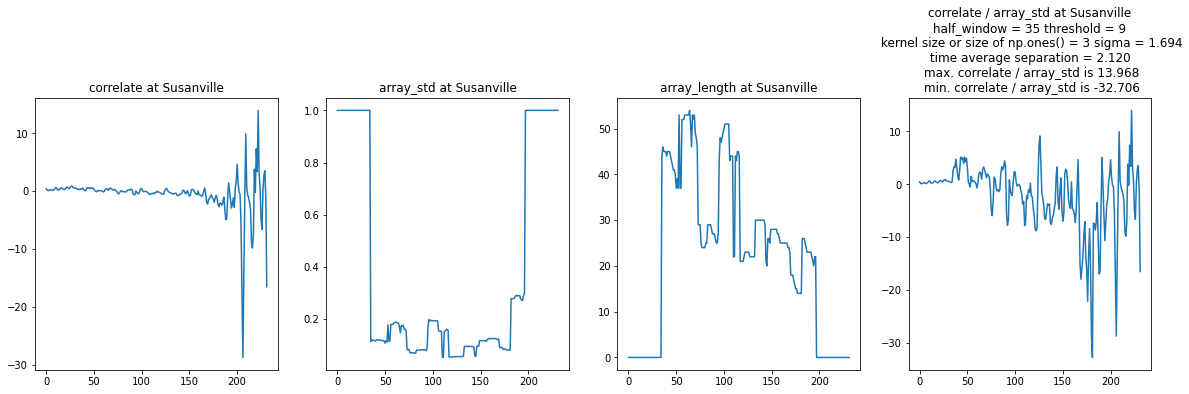

maximum safe_div(correlate, array_std) 13.9678  at np.argmax(safe_div(correlate, array_std)) 222
list_mask [126]
Possible detection in Susanville, in time : [18674.892]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 3.267658877710292
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.698184571036715
threshold 26


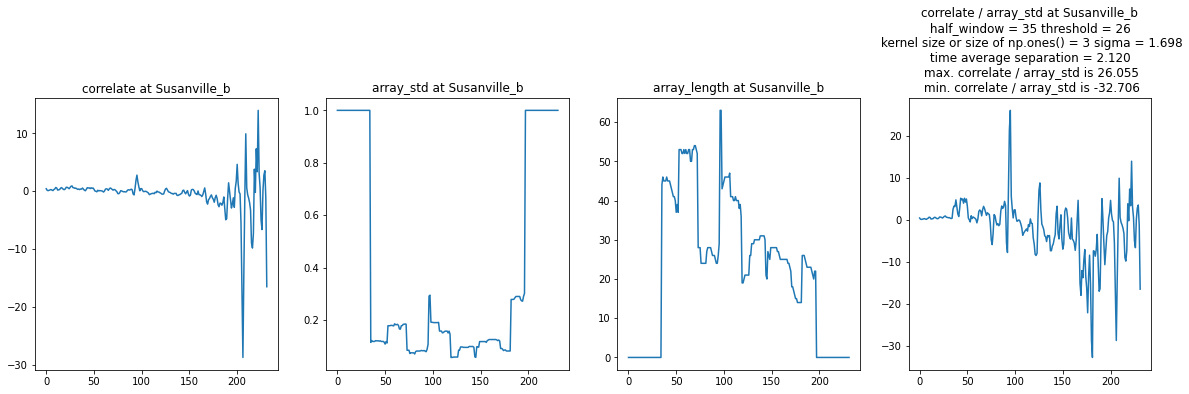

maximum safe_div(correlate, array_std) 26.05507076155497  at np.argmax(safe_div(correlate, array_std)) 95
list_mask [95]
Possible detection in Susanville_b, in time : [18608.693]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 3.421366484253177
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.7780655793214646
threshold 25


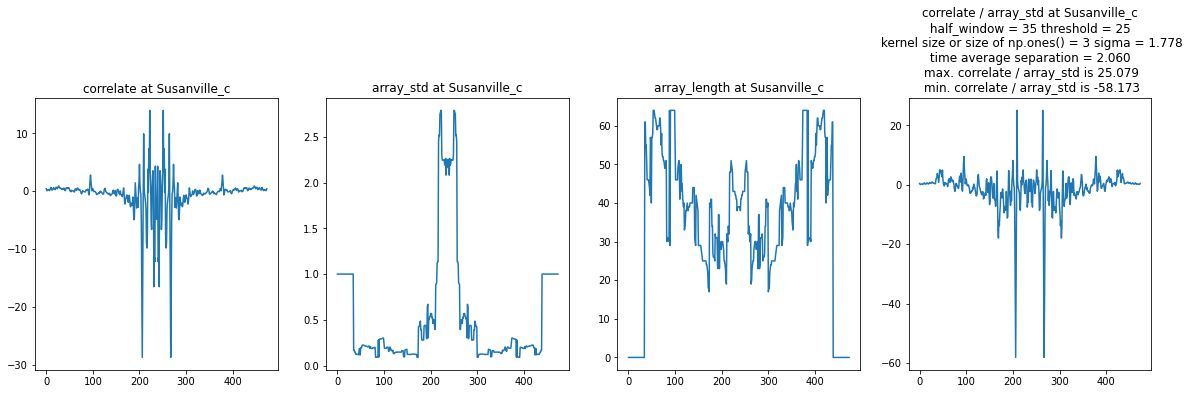

maximum safe_div(correlate, array_std) 25.07927557896054  at np.argmax(safe_div(correlate, array_std)) 209
list_mask [209, 264]
Possible detection in Susanville_c, in time : [18852.137 18965.863]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 49.89946039202316
std_norm_flux 28.6091646091033
sigma = std cross-correlation / std norm flux 1.7441774715835425
threshold 30


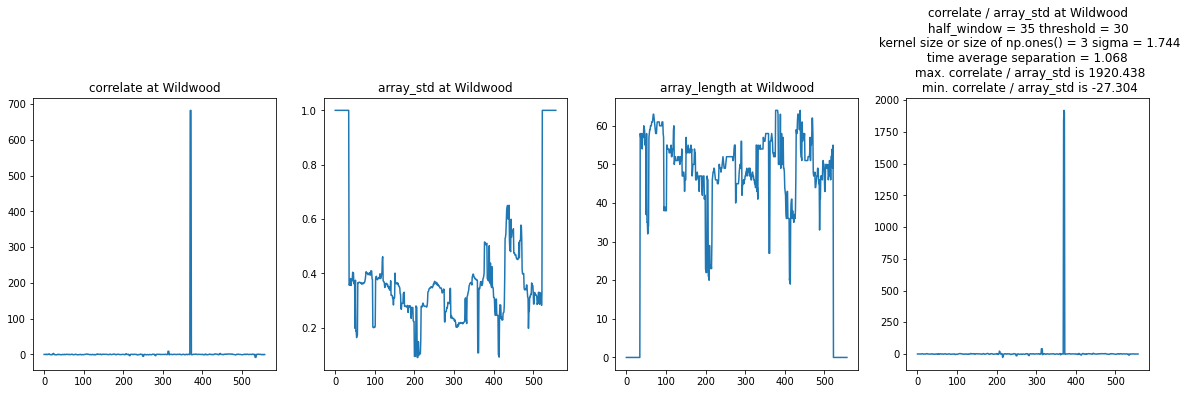

maximum safe_div(correlate, array_std) 1920.438259617386  at np.argmax(safe_div(correlate, array_std)) 370
list_mask [313, 314, 315, 369, 370, 371]
Possible detection in Wildwood, in time : [18694.764 18695.844 18696.904 18754.564 18755.634 18756.694]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.2653556898179785
std_norm_flux 0.14673759889827567
sigma = std cross-correlation / std norm flux 1.8083687603606873
threshold 3


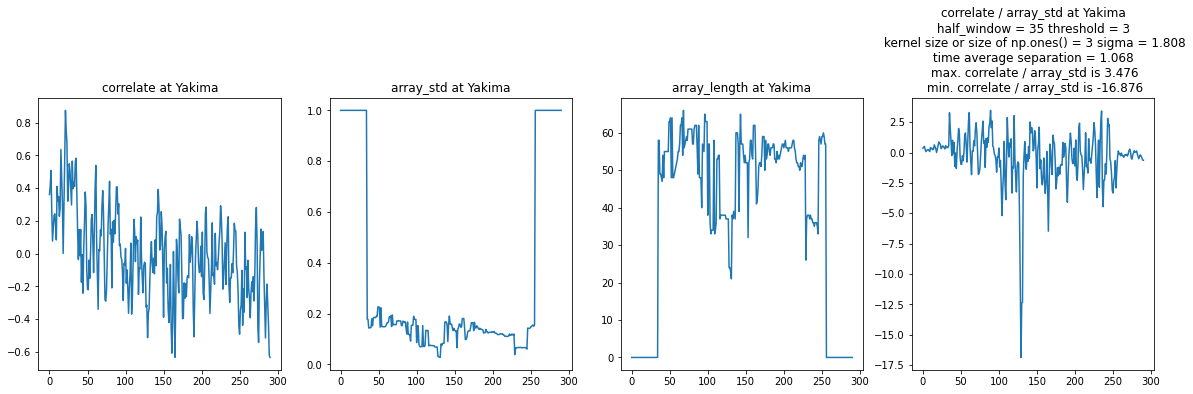

maximum safe_div(correlate, array_std) 3.4758677717520863  at np.argmax(safe_div(correlate, array_std)) 89
list_mask [35, 61, 89, 120, 235]
Possible detection in Yakima, in time : [18717.314 18745.074 18774.974 18808.074 18930.864]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 3
std_correlate 0.31825380235958717
std_norm_flux 0.16072292579244396
sigma = std cross-correlation / std norm flux 1.980139428089911
threshold 17


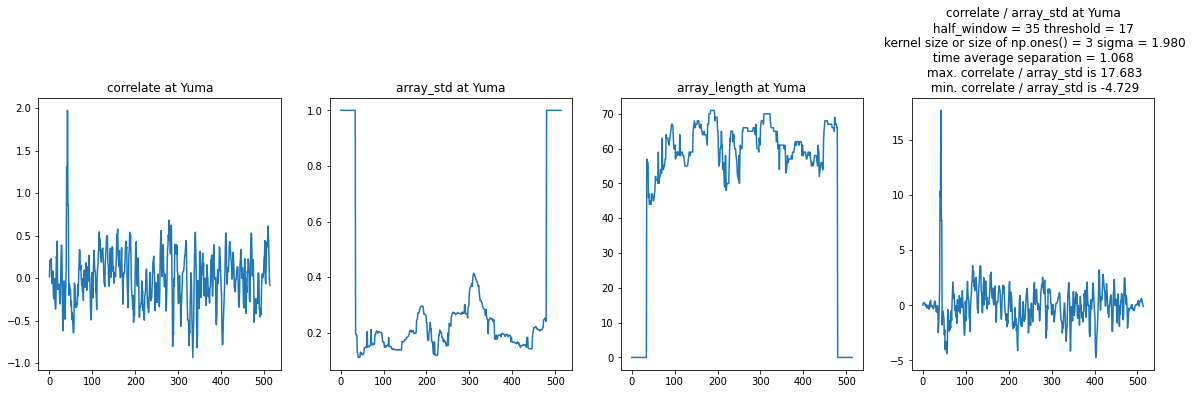

maximum safe_div(correlate, array_std) 17.683032039169877  at np.argmax(safe_div(correlate, array_std)) 42
list_mask [42]
Possible detection in Yuma, in time : [18349.756]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.3189883623368755
std_norm_flux 0.13050723485391302
sigma = std cross-correlation / std norm flux 2.4442197606434934
threshold 3


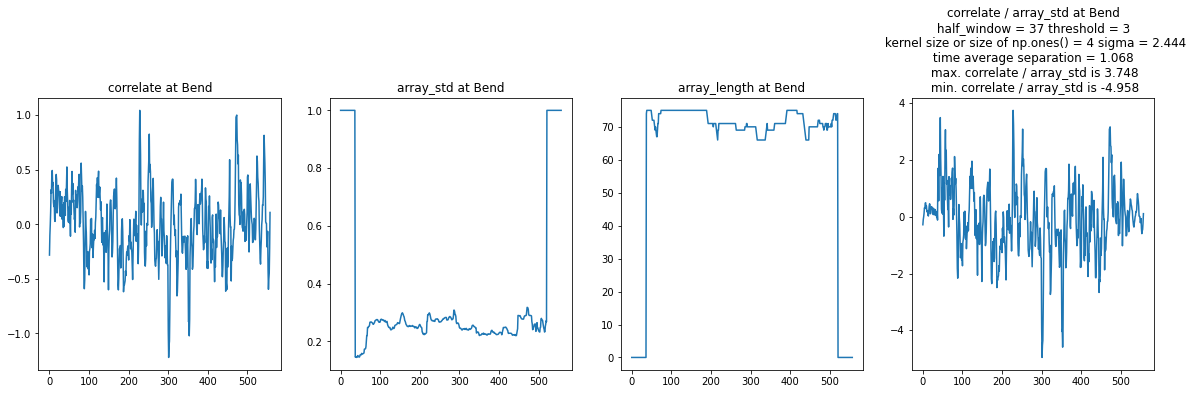

maximum safe_div(correlate, array_std) 3.7483095243003097  at np.argmax(safe_div(correlate, array_std)) 228
list_mask [44, 57, 228, 229, 252, 471, 472, 473]
Possible detection in Bend, in time : [18436.964 18450.844 18633.424 18634.494 18659.054 18892.884 18893.954
 18895.014]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.7728667033723462
std_norm_flux 0.20237887784074302
sigma = std cross-correlation / std norm flux 3.8189099159870543
threshold 3


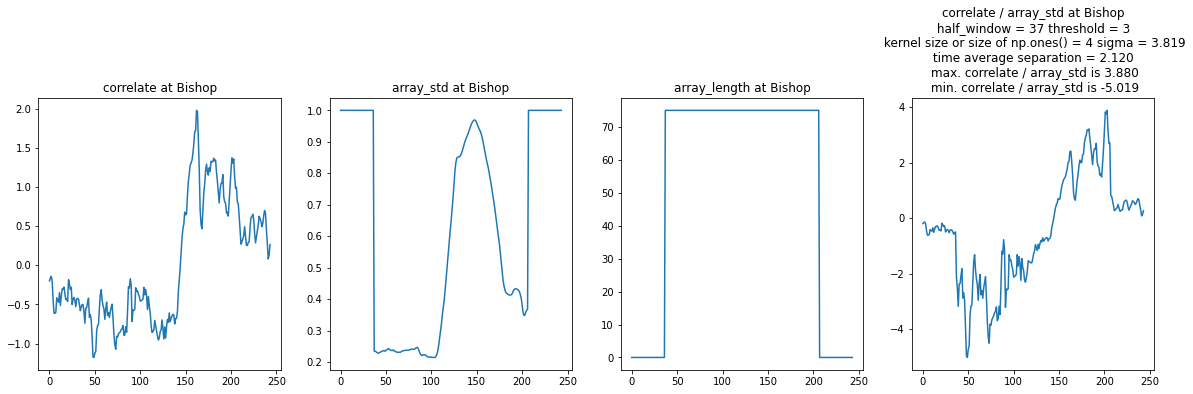

maximum safe_div(correlate, array_std) 3.8795217188304445  at np.argmax(safe_div(correlate, array_std)) 203
list_mask [181, 182, 183, 200, 201, 202, 203, 204]
Possible detection in Bishop, in time : [18786.648 18788.788 18790.928 18827.228 18829.368 18831.498 18833.638
 18835.778]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.38015894254108995
std_norm_flux 0.17587123625700551
sigma = std cross-correlation / std norm flux 2.1615754266124174
threshold 5


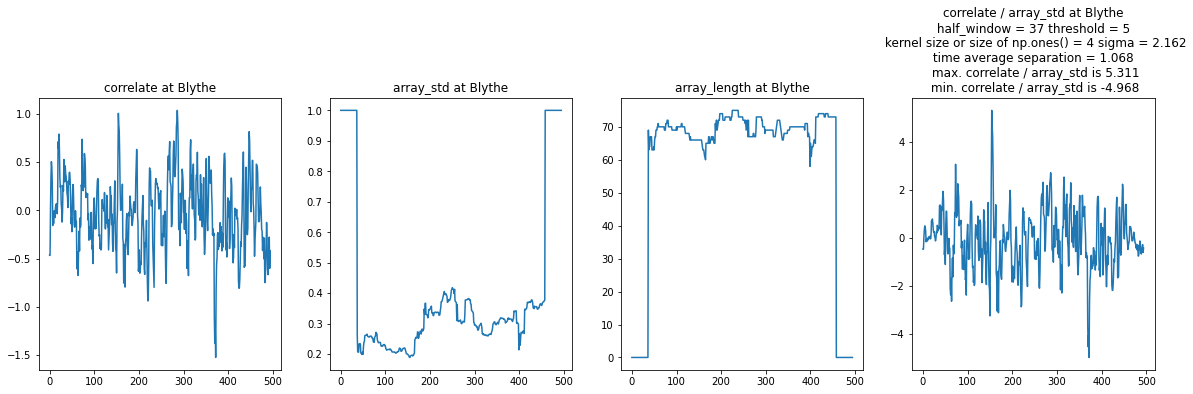

maximum safe_div(correlate, array_std) 5.310831986077337  at np.argmax(safe_div(correlate, array_std)) 154
list_mask [154]
Possible detection in Blythe, in time : [18546.684]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.21261361485471345
std_norm_flux 0.09521950449101106
sigma = std cross-correlation / std norm flux 2.2328788202713725
threshold 3


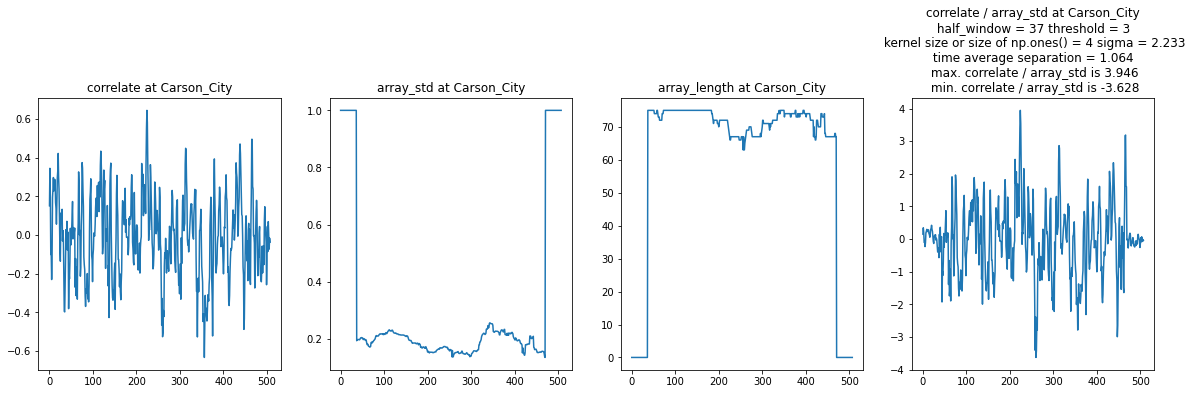

maximum safe_div(correlate, array_std) 3.9461673196899607  at np.argmax(safe_div(correlate, array_std)) 224
list_mask [223, 224, 225, 465, 466]
Possible detection in Carson_City, in time : [18639.552 18640.621 18641.691 18897.947 18899.012]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.545893998464101
std_norm_flux 0.2019605857474751
sigma = std cross-correlation / std norm flux 2.7029729411988783
threshold 2


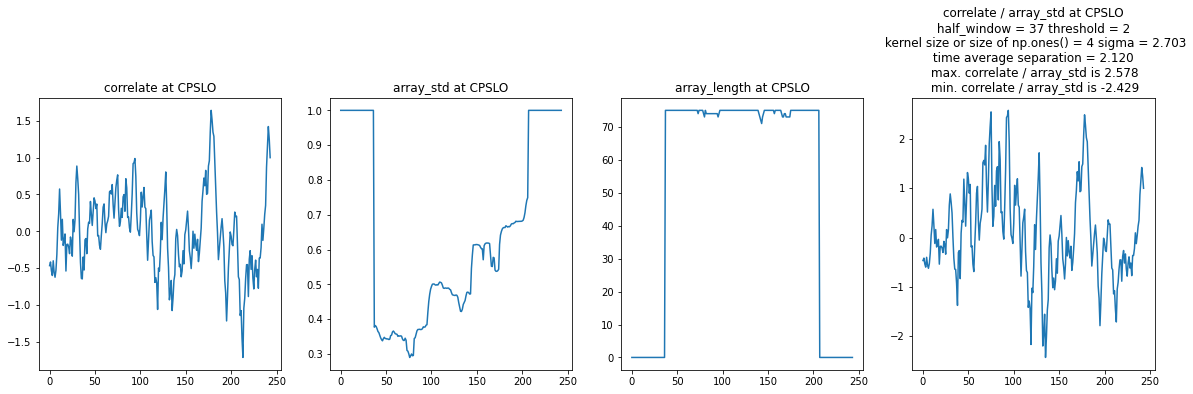

maximum safe_div(correlate, array_std) 2.5776098017035  at np.argmax(safe_div(correlate, array_std)) 94
list_mask [74, 75, 92, 93, 94, 177, 178, 179, 180]
Possible detection in CPSLO, in time : [18566.158 18568.298 18604.598 18606.728 18608.868 18786.118 18788.248
 18790.388 18792.518]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.5590339875899496
std_norm_flux 0.22939567213016832
sigma = std cross-correlation / std norm flux 2.4369857652446525
threshold 5


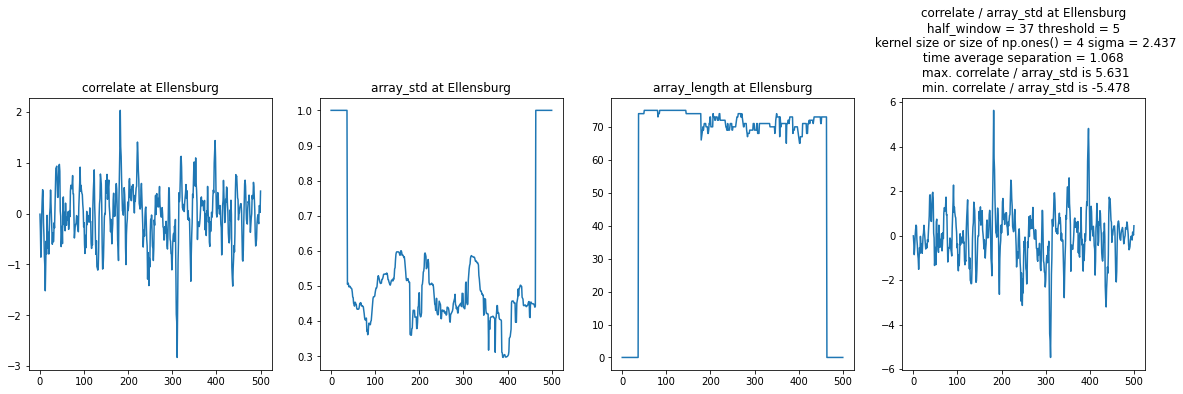

maximum safe_div(correlate, array_std) 5.631415495270676  at np.argmax(safe_div(correlate, array_std)) 182
list_mask [182]
Possible detection in Ellensburg, in time : [18601.614]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.7023253519168521
std_norm_flux 0.22184102699731292
sigma = std cross-correlation / std norm flux 3.165894791522756
threshold 3


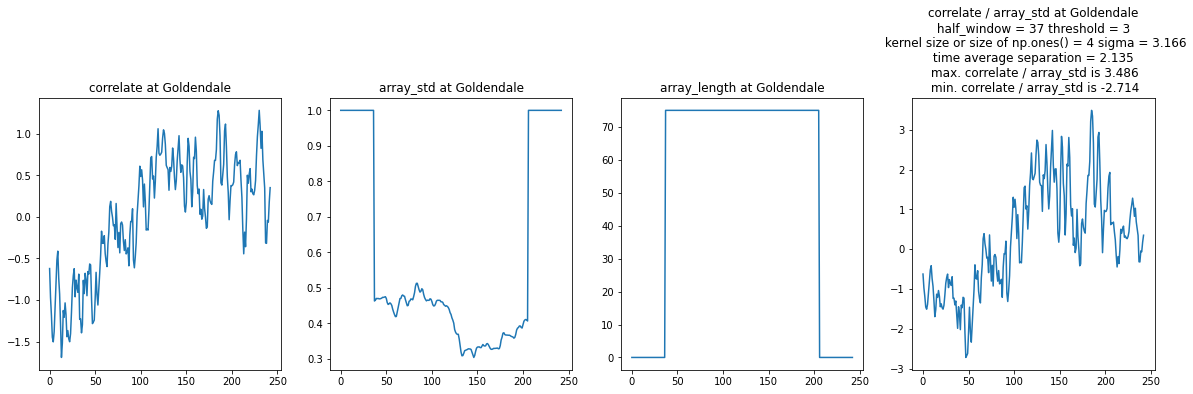

maximum safe_div(correlate, array_std) 3.485862334088966  at np.argmax(safe_div(correlate, array_std)) 185
list_mask [184, 185, 186]
Possible detection in Goldendale, in time : [18926.378 18928.518 18930.648]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.3057523944680551
std_norm_flux 0.1378076016905981
sigma = std cross-correlation / std norm flux 2.2186903386833627
threshold 2


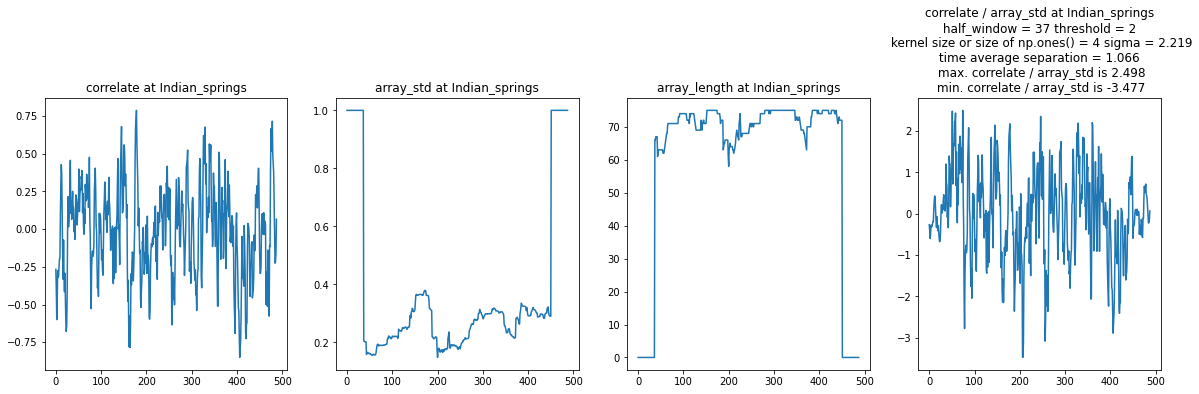

maximum safe_div(correlate, array_std) 2.4980381732927937  at np.argmax(safe_div(correlate, array_std)) 74
list_mask [51, 56, 57, 58, 74, 87, 145, 178, 246, 329, 360, 361]
Possible detection in Indian_springs, in time : [18451.824 18457.164 18458.224 18459.294 18476.374 18490.254 18552.194
 18587.424 18660.024 18748.654 18781.754 18782.814]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.3096490687342434
std_norm_flux 0.1380105245335426
sigma = std cross-correlation / std norm flux 2.243662719063032
threshold 2


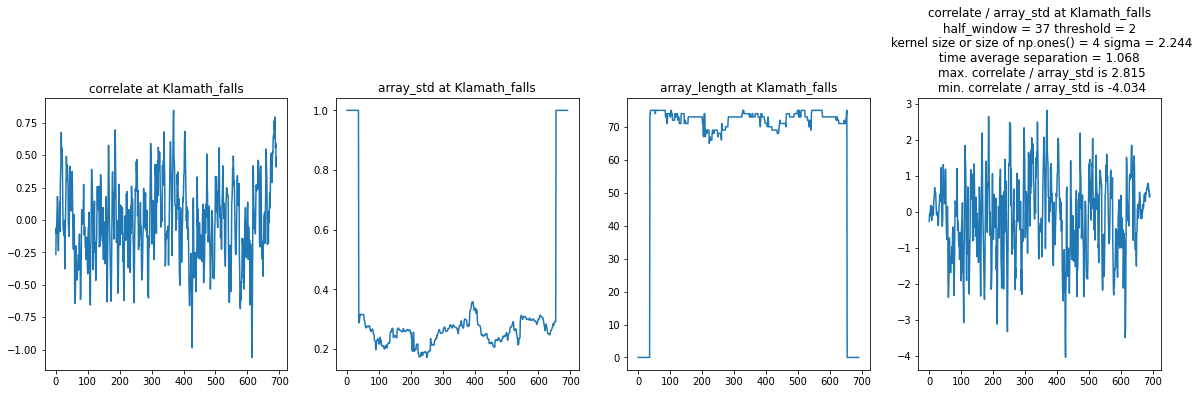

maximum safe_div(correlate, array_std) 2.814785539214114  at np.argmax(safe_div(correlate, array_std)) 369
list_mask [165, 186, 252, 254, 255, 297, 321, 339, 359, 368, 369, 404, 473, 512]
Possible detection in Klamath_falls, in time : [18412.774 18435.194 18505.664 18507.804 18508.864 18553.714 18579.334
 18598.554 18619.904 18629.524 18630.584 18667.954 18741.634 18783.274]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.44625682102475733
std_norm_flux 0.14554610160413653
sigma = std cross-correlation / std norm flux 3.0660857014123857
threshold 6


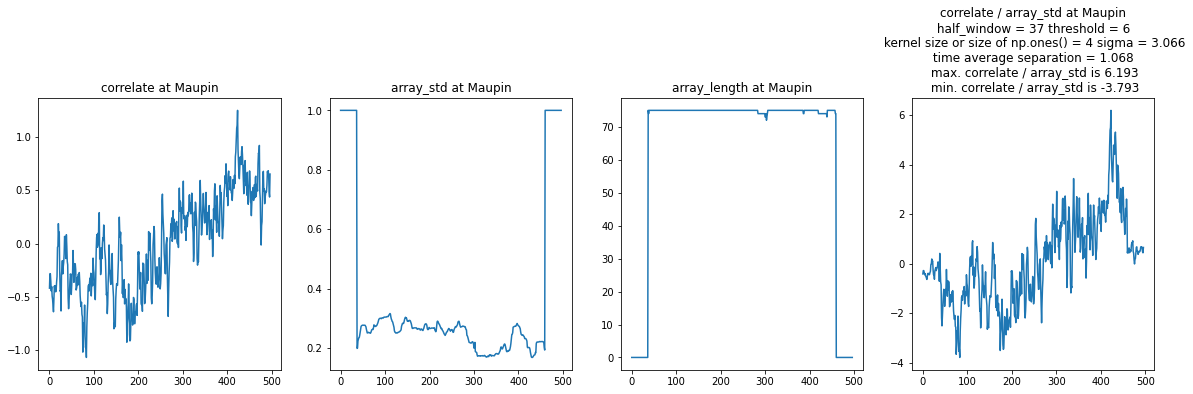

maximum safe_div(correlate, array_std) 6.192574108550187  at np.argmax(safe_div(correlate, array_std)) 423
list_mask [423]
Possible detection in Maupin, in time : [18859.824]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.40562141962941056
std_norm_flux 0.16414524211112588
sigma = std cross-correlation / std norm flux 2.471112865731472
threshold 4


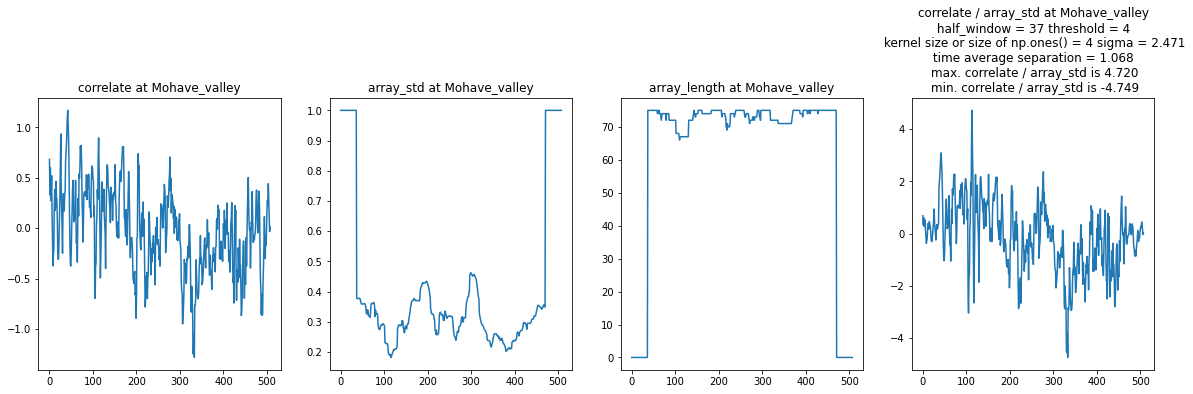

maximum safe_div(correlate, array_std) 4.719535697195077  at np.argmax(safe_div(correlate, array_std)) 113
list_mask [113]
Possible detection in Mohave_valley, in time : [18493.134]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.2685132811345091
std_norm_flux 0.11027922160658381
sigma = std cross-correlation / std norm flux 2.4348492601119207
threshold 3


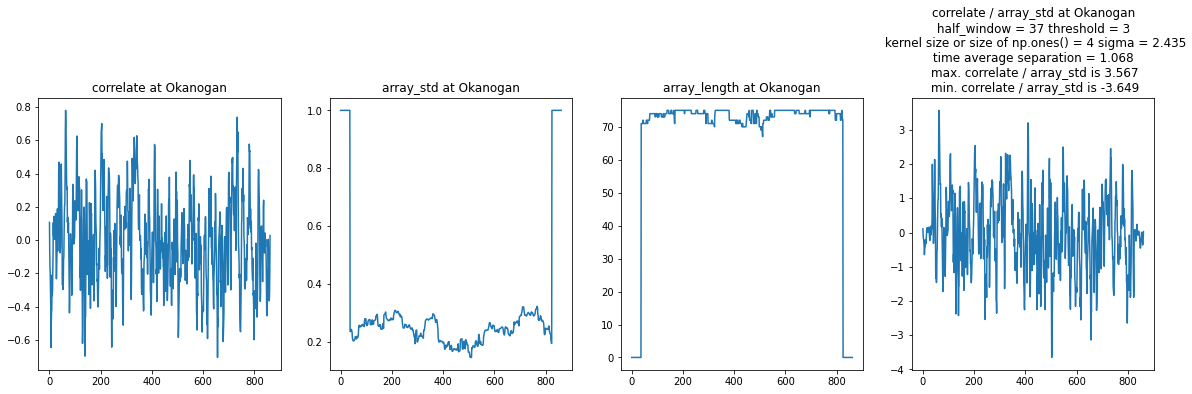

maximum safe_div(correlate, array_std) 3.56715515109213  at np.argmax(safe_div(correlate, array_std)) 63
list_mask [62, 63, 64, 410, 411]
Possible detection in Okanogan, in time : [18169.404 18170.464 18171.534 18540.974 18542.034]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.6491042419654105
std_norm_flux 0.19011149253937454
sigma = std cross-correlation / std norm flux 3.414334574386515
threshold 7


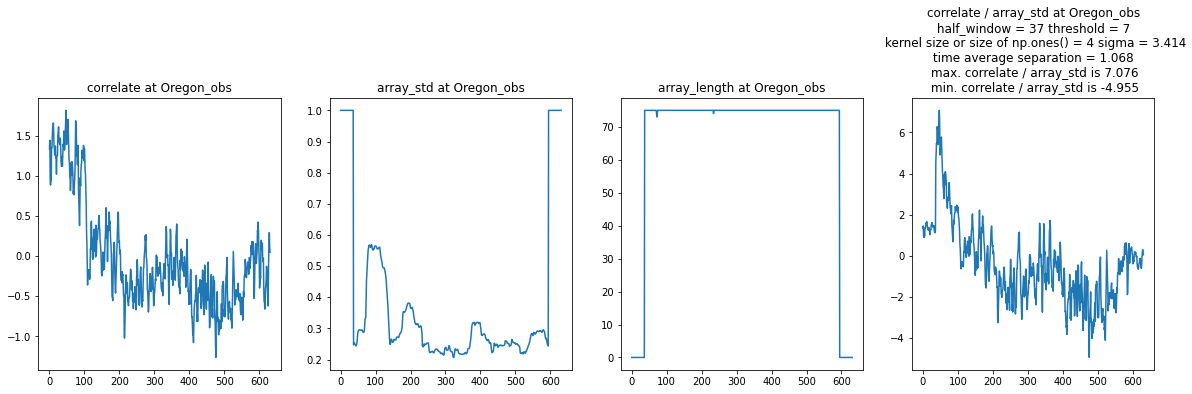

maximum safe_div(correlate, array_std) 7.076345384231465  at np.argmax(safe_div(correlate, array_std)) 47
list_mask [47]
Possible detection in Oregon_obs, in time : [18367.054]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.22427867718561786
std_norm_flux 0.09775810947071388
sigma = std cross-correlation / std norm flux 2.294220688185533
threshold 2


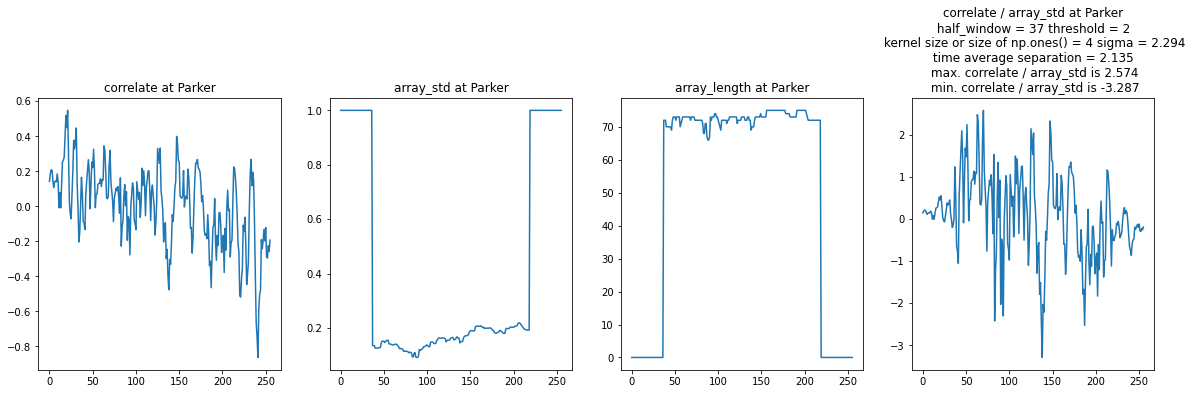

maximum safe_div(correlate, array_std) 2.5737405402175835  at np.argmax(safe_div(correlate, array_std)) 70
list_mask [45, 51, 63, 64, 70, 125, 128, 147, 148]
Possible detection in Parker, in time : [18473.748 18486.558 18512.178 18514.318 18527.128 18644.578 18650.988
 18691.558 18693.698]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.24448791443165052
std_norm_flux 0.08920128937778901
sigma = std cross-correlation / std norm flux 2.740856282874849
threshold 5


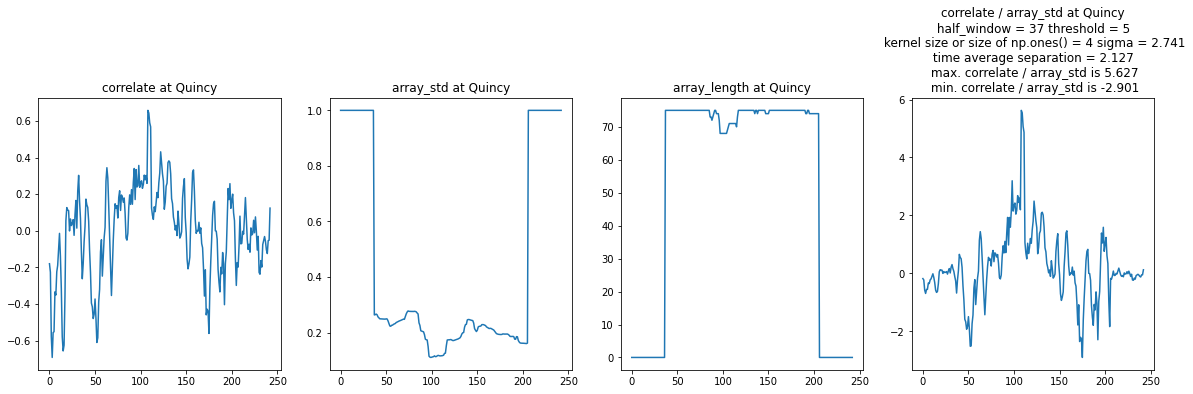

maximum safe_div(correlate, array_std) 5.62726834987358  at np.argmax(safe_div(correlate, array_std)) 108
list_mask [108, 109, 110]
Possible detection in Quincy, in time : [18643.803 18645.942 18648.077]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.2890123579473668
std_norm_flux 0.1285539277124569
sigma = std cross-correlation / std norm flux 2.248179912431889
threshold 6


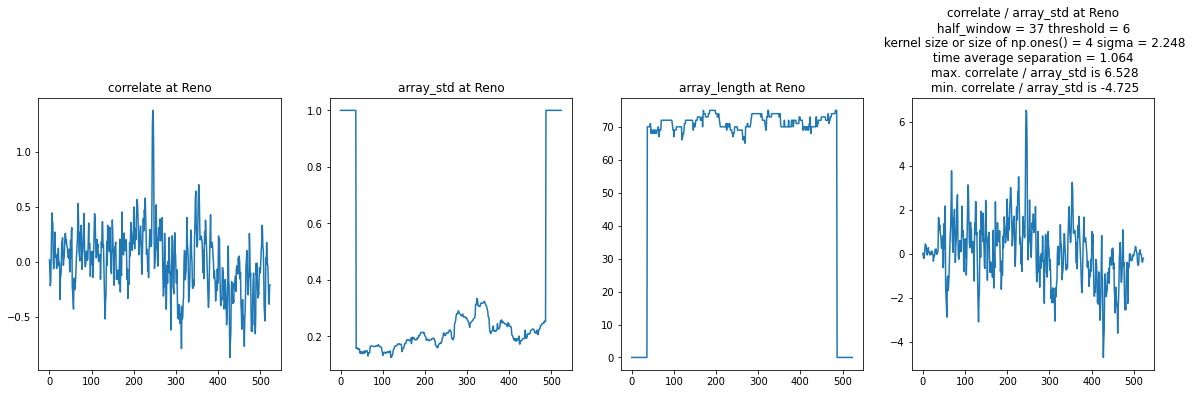

maximum safe_div(correlate, array_std) 6.528268960493116  at np.argmax(safe_div(correlate, array_std)) 245
list_mask [245, 246]
Possible detection in Reno, in time : [18641.416 18642.483]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.41870504651916607
std_norm_flux 0.13170757531223723
sigma = std cross-correlation / std norm flux 3.179050601505252
threshold 2


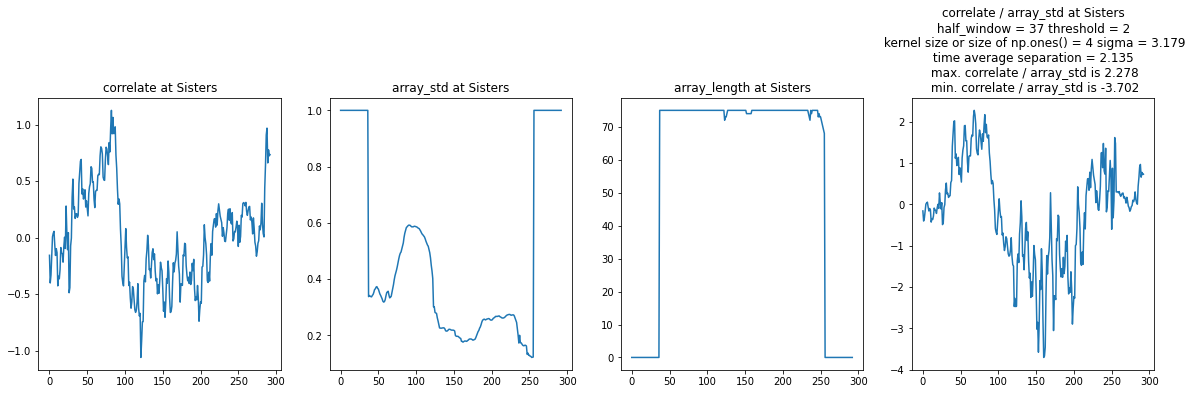

maximum safe_div(correlate, array_std) 2.2783786592935367  at np.argmax(safe_div(correlate, array_std)) 68
list_mask [41, 42, 67, 68, 69, 82]
Possible detection in Sisters, in time : [18420.588 18422.718 18476.108 18478.248 18480.378 18508.138]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.548423932904164
std_norm_flux 1.9202848518848066
sigma = std cross-correlation / std norm flux 1.8478633153937025
threshold 5


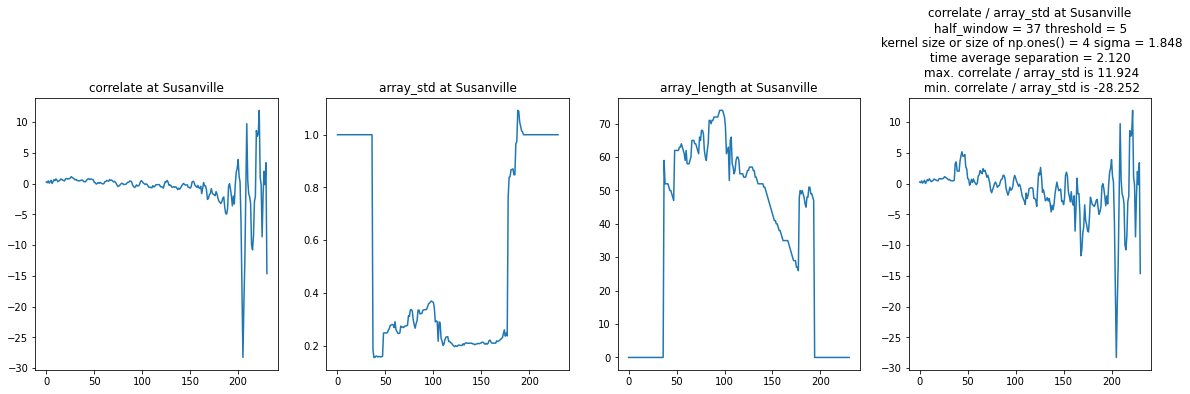

maximum safe_div(correlate, array_std) 11.9237  at np.argmax(safe_div(correlate, array_std)) 222
list_mask [44]
Possible detection in Susanville, in time : [18499.785]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.569182710731447
std_norm_flux 1.9242071406380978
sigma = std cross-correlation / std norm flux 1.8548848693846178
threshold 8


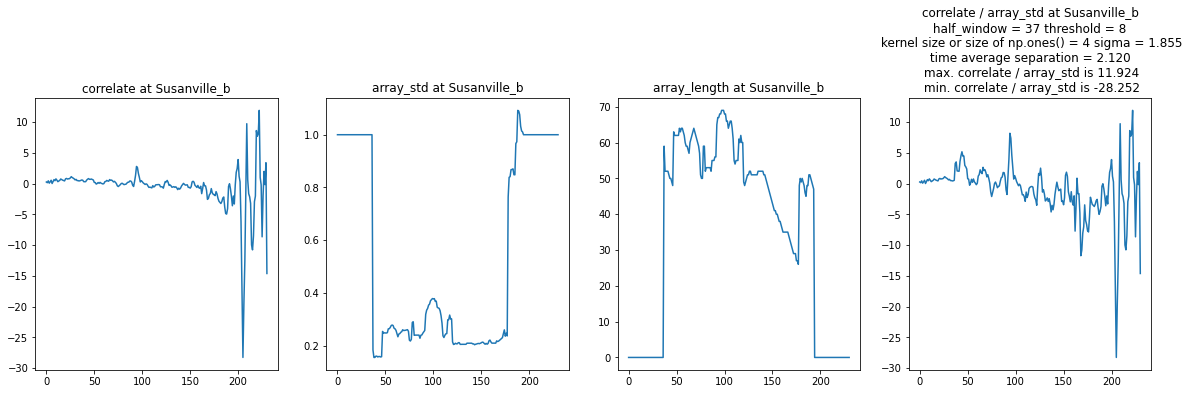

maximum safe_div(correlate, array_std) 11.9237  at np.argmax(safe_div(correlate, array_std)) 222
list_mask [94]
Possible detection in Susanville_b, in time : [18606.558]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 3.770308933314508
std_norm_flux 1.9242071406380972
sigma = std cross-correlation / std norm flux 1.9594090748796487
threshold 7


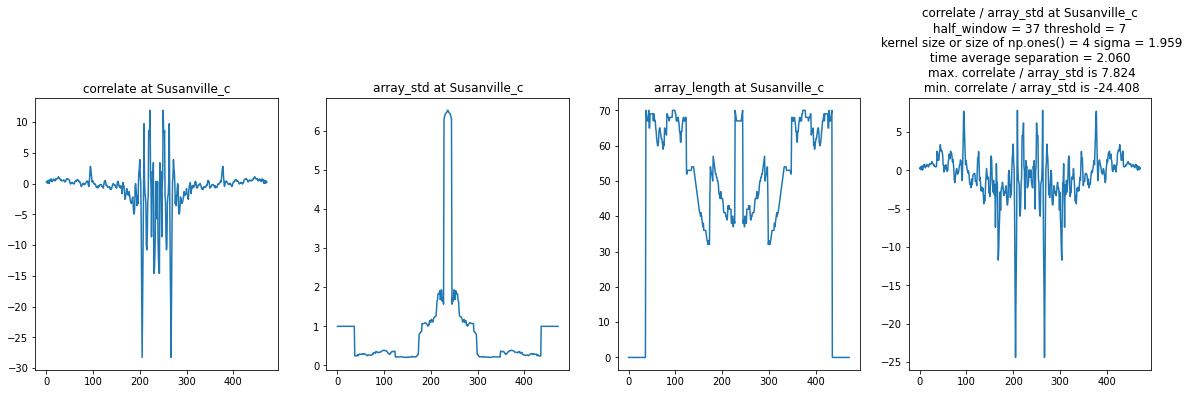

maximum safe_div(correlate, array_std) 7.82425220062377  at np.argmax(safe_div(correlate, array_std)) 209
list_mask [94, 95, 209, 263, 377, 378]
Possible detection in Susanville_c, in time : [18606.558 18608.693 18852.137 18963.002 19191.558 19193.424]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 57.60508397462698
std_norm_flux 28.6091646091033
sigma = std cross-correlation / std norm flux 2.0135185616813613
threshold 30


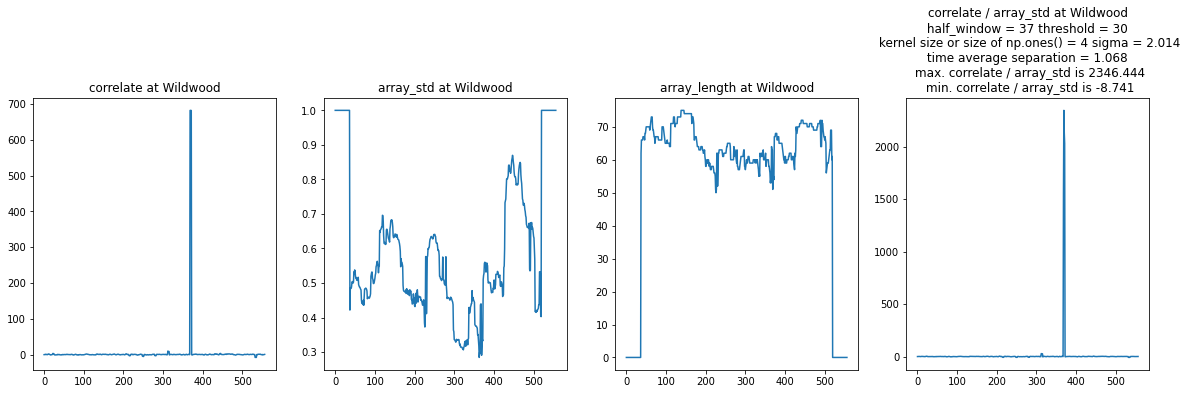

maximum safe_div(correlate, array_std) 2346.4443715286484  at np.argmax(safe_div(correlate, array_std)) 369
list_mask [368, 369, 370, 371]
Possible detection in Wildwood, in time : [18753.494 18754.564 18755.634 18756.694]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.3154393865761967
std_norm_flux 0.14673759889827567
sigma = std cross-correlation / std norm flux 2.149683441357602
threshold 2


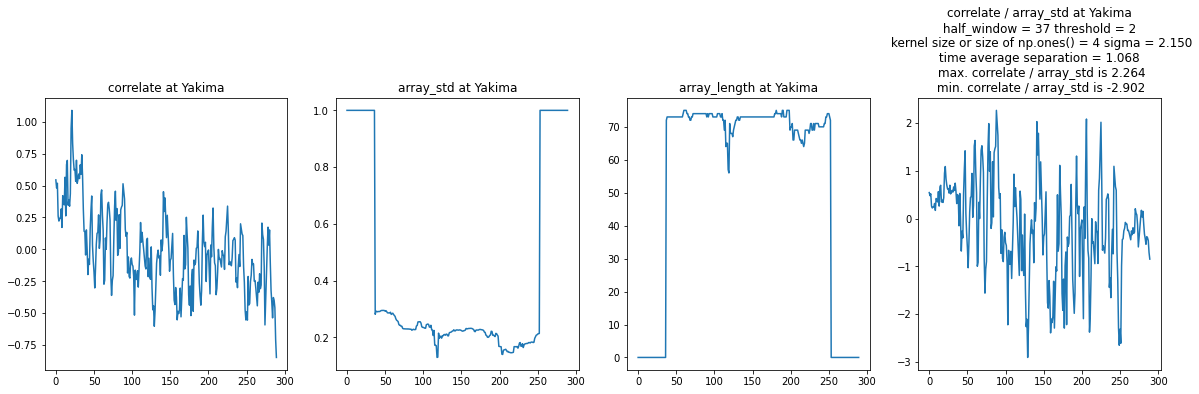

maximum safe_div(correlate, array_std) 2.263780033308817  at np.argmax(safe_div(correlate, array_std)) 88
list_mask [88, 141, 206, 225]
Possible detection in Yakima, in time : [18773.904 18830.494 18899.894 18920.184]
--------------------------------------------------------------------------------------------
kernel size or size of np.ones() : 4
std_correlate 0.3844621111763363
std_norm_flux 0.16072292579244396
sigma = std cross-correlation / std norm flux 2.3920800923747927
threshold 7


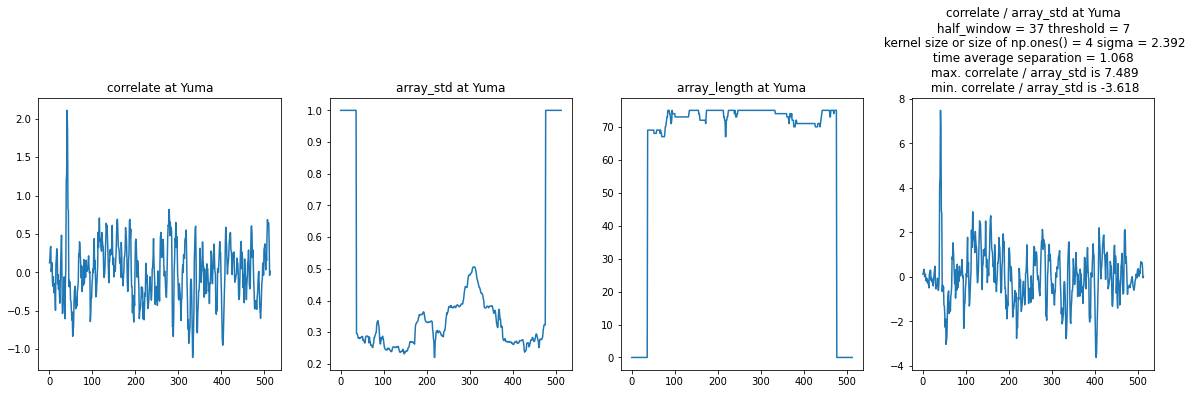

maximum safe_div(correlate, array_std) 7.489430376132052  at np.argmax(safe_div(correlate, array_std)) 41
list_mask [41]
Possible detection in Yuma, in time : [18408.69]
--------------------------------------------------------------------------------------------


In [35]:
# itero sobre todas las localidades
for j in range(2, 5, 1): # iteration over kernel size
  for filename in namelist:
    algorithm(filename, maximum_exp_event_duration=0.1, unc_max_exp_event_duration=0, 
              exposure_time=0.05, num_zeros=4, num_ones=j, half_window=30, threshold=30, sigma=1.7)